2025-12-19 20:33:59.249 | INFO     | tf_chpvk_pv.dataset:create_dataset:41 - Processing dataset...
2025-12-19 20:33:59.675 | SUCCESS  | tf_chpvk_pv.dataset:create_dataset:213 - Processing dataset complete.
2025-12-19 20:33:59.675 | INFO     | tf_chpvk_pv.dataset:train_test_split_:227 - Creating train and test dataset...
2025-12-19 20:33:59.690 | SUCCESS  | tf_chpvk_pv.dataset:train_test_split_:261 - Creating train and test dataset complete.


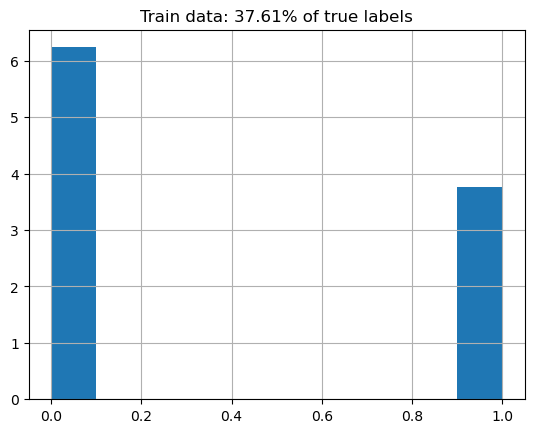

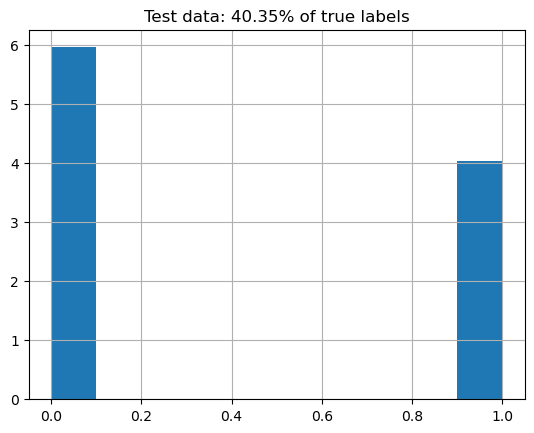

In [8]:
from tf_chpvk_pv.dataset import *
import matplotlib.pyplot as plt
import pandas as pd

df = create_dataset(use_turnley_radii=True)

train_df, test_df = train_test_split_()

train_df.exp_label.hist(density=True)
amount_of_true = train_df[train_df.exp_label == 1].shape[0]/train_df.shape[0]
plt.title('Train data: {:.2f}% of true labels'.format(amount_of_true*100))
plt.show()
test_df.exp_label.hist(density=True)
amount_of_true = test_df[test_df.exp_label == 1].shape[0]/test_df.shape[0]
plt.title('Test data: {:.2f}% of true labels'.format(amount_of_true*100))
plt.show()

In [9]:
#count the number of material in each class in the training/test sets
dict_ch = {133:'F',
           181:'Cl',
           198:'Se',
           196:'Br',
           184.:'S',
           220.00000000000003:'I'
          }

train_df['X'] = train_df.replace({'rX':dict_ch})['rX']
test_df['X'] = test_df.replace({'rX':dict_ch})['rX']

train_vc = pd.DataFrame(train_df[['X', 'exp_label']].groupby('X')['exp_label'].value_counts())
test_vc = pd.DataFrame(test_df[['X', 'exp_label']].groupby('X')['exp_label'].value_counts())

print('In the training set, %s compositions are unstable and %s are stable.' % (train_df['exp_label'].value_counts().values[0], train_df['exp_label'].value_counts().values[1]))
print('The distribution in the training set by anions is the following')
display(train_vc)

print('In the test set, %s compositions are unstable and %s are stable.' % (test_df['exp_label'].value_counts().values[0], test_df['exp_label'].value_counts().values[1]))
print('The distribution in the test set by anions is the following')
display(test_vc)

In the training set, 141 compositions are unstable and 85 are stable.
The distribution in the training set by anions is the following


count
X  exp_label       
Br 0.0           17
   1.0            4
Cl 0.0           43
   1.0           14
F  1.0           40
   0.0           13
I  0.0           29
   1.0            5
S  0.0           26
   1.0           21
Se 0.0           13
   1.0            1

In the test set, 34 compositions are unstable and 23 are stable.
The distribution in the test set by anions is the following


count
X  exp_label       
Br 0.0            5
   1.0            1
Cl 0.0           10
   1.0            4
F  1.0           11
   0.0            2
I  0.0            7
   1.0            2
S  0.0            7
   1.0            5
Se 0.0            3

In [4]:
import glob as gl
from tf_chpvk_pv.config import DATA_DIR

features_path = DATA_DIR / 'features_space/features/'

files = gl.glob(features_path.as_posix() + '/*.csv')

Classification tree f1 (for t) on the train set: 0.747788.
Classification tree f1 (for t) on the train set (5 fold CV): 0.654770.
Classification tree f1 (for t) on the test set: 0.596491.
0.851217 < t < 0.953118 indicates stable perovskites.
Classification tree f1 (for tau) on the train set: 0.738938.
Classification tree f1 (for tau) on the train set (5 fold CV): 0.741283.
Classification tree f1 (for tau) on the test set: 0.684211.
tau < 4.180000 indicates stable perovskites.
Classification tree f1 (for t_jess) on the train set: 0.743363.
Classification tree f1 (for t_jess) on the train set (5 fold CV): 0.683073.
Classification tree f1 (for t_jess) on the test set: 0.701754.
0.823404 < t_jess < 1.055433 indicates stable perovskites.
2025-12-19 15:52:51.554 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio**3) - rA_rX_ratio) - ((log_rA_rB_ratio**3) - log_rA_rB_ratio))
Clas

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:35:25.435 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_diff * rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) - ((chi_diff * chi_BX_ratio) * (chi_diff - chi_BX_ratio)))
Classification tree f1 (for t_sisso_45) on the train set: 0.707965.
Classification tree f1 (for t_sisso_45) on the train set (5 fold CV): 0.677022.
Classification tree f1 (for t_sisso_45) on the test set: 0.684211.
t_sisso_45 < 0.195454 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:35:54.275 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio**3) - exp(rB_rX_ratio)) - (log_rA_rB_ratio**3))
Classification tree f1 (for t_sisso_68) on the train set: 0.650442.
Classification tree f1 (for t_sisso_68) on the train set (5 fold CV): 0.644646.
Classification tree f1 (for t_sisso_68) on the test set: 0.631579.
t_sisso_68 < -1.349861 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:36:22.411 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(chi_diff - chi_BX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|) - ((|rB_rX_ratio - log_rA_rB_ratio|) - rA_rX_ratio))
Classification tree f1 (for t_sisso_0) on the train set: 0.694690.
Classification tree f1 (for t_sisso_0) on the train set (5 fold CV): 0.649164.
Classification tree f1 (for t_sisso_0) on the test set: 0.649123.
t_sisso_0 < 0.693762 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:37:03.076 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (|(|(|rA_rX_ratio - rB_rX_ratio|) - exp(log_rA_rB_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(1.0 / rB_rX_ratio) - (|chi_BX_ratio - log_rA_rB_ratio|)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature exp((|exp(rA_rX_ratio) - (1.0 / log_rA_rB_ratio)|)) has values greater than 1e6. Skipping.
Feature (|exp((1.0 / log_rA_rB_ratio)) - (|exp(log_rA_rB_ratio) - chi_BX_ratio|)|) has values greater than 1e6. Skipping.
Feature (|(|(1.0 / chi_diff) - (|chi_diff - log_rA_rB_ratio|)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature exp((|(|rB_rX_ratio - log_rA_rB_ratio|) - (1.0 / log_rA_rB_ratio)|)) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - chi_BX_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has v

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:37:32.751 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio - log_rA_rB_ratio)**2) - (rA_rX_ratio**2))
Classification tree f1 (for t_sisso_77) on the train set: 0.796460.
Classification tree f1 (for t_sisso_77) on the train set (5 fold CV): 0.665885.
Classification tree f1 (for t_sisso_77) on the test set: 0.807018.
t_sisso_77 < -0.863126 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:38:06.004 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|chi_diff - rA_rX_ratio|) - (rA_rX_ratio - log_rA_rB_ratio)|) - (exp(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|))|)
Classification tree f1 (for t_sisso_47) on the train set: 0.814159.
Classification tree f1 (for t_sisso_47) on the train set (5 fold CV): 0.723964.
Classification tree f1 (for t_sisso_47) on the test set: 0.824561.
t_sisso_47 < 2.126771 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:38:36.657 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio - rB_rX_ratio) - (log_rA_rB_ratio**2)) - ((log_rA_rB_ratio**2) - exp(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_67) on the train set: 0.849558.
Classification tree f1 (for t_sisso_67) on the train set (5 fold CV): 0.766202.
Classification tree f1 (for t_sisso_67) on the test set: 0.877193.
t_sisso_67 < 1.483274 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:39:08.805 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(rA_rX_ratio**2) - (rB_rX_ratio**2)|) - exp((|rB_rX_ratio - log_rA_rB_ratio|))|)
Classification tree f1 (for t_sisso_95) on the train set: 0.703540.
Classification tree f1 (for t_sisso_95) on the train set (5 fold CV): 0.716459.
Classification tree f1 (for t_sisso_95) on the test set: 0.684211.
t_sisso_95 < 0.926208 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:39:40.377 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_diff) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_BX_ratio) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / (rB_rX_ratio * log_rA_rB_ratio)) / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio / chi_diff))) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio / chi_diff))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_BX_ratio) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / (rA_rX_ratio * 

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:40:05.307 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((chi_BX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio + log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio + log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rB_rX_ratio**3) + log_rA_rB_ratio) + log_rA_rB_ratio)
Classification tree f1 (for t_sisso_32) on the train set: 0.482301.
Classification tree f1 (for t_sisso_32) on the train set (5 fold CV): 0.587466.
Classification tree f1 (for t_sisso_32) on the test set: 0.438596.
t_sisso_32 < 0.798679 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:40:37.844 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|chi_diff - rA_rX_ratio|) - chi_diff|) - (|(|rA_rX_ratio - log_rA_rB_ratio|) - (log_rA_rB_ratio**2)|)|)
Classification tree f1 (for t_sisso_103) on the train set: 0.778761.
Classification tree f1 (for t_sisso_103) on the train set (5 fold CV): 0.718494.
Classification tree f1 (for t_sisso_103) on the test set: 0.771930.
t_sisso_103 < 0.493591 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:41:07.780 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio + log_rA_rB_ratio) - exp(rB_rX_ratio)) - (exp(log_rA_rB_ratio) - rA_rX_ratio))
Classification tree f1 (for t_sisso_3) on the train set: 0.805310.
Classification tree f1 (for t_sisso_3) on the train set (5 fold CV): 0.707765.
Classification tree f1 (for t_sisso_3) on the test set: 0.824561.
t_sisso_3 < -1.090230 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:41:41.411 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((1.0 / (chi_diff + log_rA_rB_ratio)) + ((rB_rX_ratio * log_rA_rB_ratio) * chi_diff))
Classification tree f1 (for t_sisso_19) on the train set: 0.623894.
Classification tree f1 (for t_sisso_19) on the train set (5 fold CV): 0.656379.
Classification tree f1 (for t_sisso_19) on the test set: 0.578947.
t_sisso_19 < 0.850900 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:42:11.224 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((chi_diff / rA_rX_ratio) / exp(rA_rX_ratio)) / exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / exp(rA_rX_ratio)) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((chi_BX_ratio / exp(chi_BX_ratio)) / exp((chi_diff / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / rA_rX_ratio) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / rA_rX_ratio) / exp((rB_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rA_rX_ratio) / rA_rX_ratio) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_diff / log_rA_rB_ratio)) / exp((chi_BX_ratio / chi_diff))) has values g

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:42:39.367 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio**2) * (rB_rX_ratio * log_rA_rB_ratio)) * (log(rB_rX_ratio) * (rB_rX_ratio**2)))
Classification tree f1 (for t_sisso_126) on the train set: 0.774336.
Classification tree f1 (for t_sisso_126) on the train set (5 fold CV): 0.683975.
Classification tree f1 (for t_sisso_126) on the test set: 0.736842.
t_sisso_126 < -0.033206 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:43:15.013 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio / chi_diff)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / (log_rA_rB_ratio^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio^3) / (chi_diff - rA_rX_ratio)) / ((chi_diff - log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((chi_diff / rA_rX_ratio) - (chi_BX_ratio**3)) - ((log_rA_rB_ratio / rA_rX_ratio) - (log_rA_rB_ratio**3)))
Classification tree f1 (for t_sisso_63) on the train set: 0.756637.
Classification tree f1 (for t_sisso_63) on the train set (5 fold CV): 0.530176.
Classification tree f1 (for t_sisso_63) on the test set: 0.684211.
t_sisso_63 < -0.804264 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:43:45.501 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rB_rX_ratio) * rB_rX_ratio) * ((rB_rX_ratio * log_rA_rB_ratio) * rB_rX_ratio))
Classification tree f1 (for t_sisso_119) on the train set: 0.792035.
Classification tree f1 (for t_sisso_119) on the train set (5 fold CV): 0.707730.
Classification tree f1 (for t_sisso_119) on the test set: 0.771930.
t_sisso_119 < -0.044782 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:44:18.069 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio + log_rA_rB_ratio) + log_rA_rB_ratio) + ((log_rA_rB_ratio**3)**2))
Classification tree f1 (for t_sisso_39) on the train set: 0.473451.
Classification tree f1 (for t_sisso_39) on the train set (5 fold CV): 0.605871.
Classification tree f1 (for t_sisso_39) on the test set: 0.456140.
t_sisso_39 < 1.305877 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:44:49.526 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio^2)^2) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio)^2)^2) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio)^2) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature ((ln(chi_diff) / log_rA_rB_ratio) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature ((ln(chi_diff) / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio)^2) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio)^2)^2) has values greater than 1e6. Skipp

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature exp((exp(chi_diff) * (chi_diff * log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (sqrt(sqrt(chi_diff)) * (sqrt(rB_rX_ratio) * (rB_rX_ratio * log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_118) on the train set: 0.765487.
Classification tree f1 (for t_sisso_118) on the train set (5 fold CV): 0.673500.
Classification tree f1 (for t_sisso_118) on the test set: 0.719298.
t_sisso_118 < 0.198533 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:45:54.375 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * (rB_rX_ratio * log_rA_rB_ratio)) * ((rA_rX_ratio**2) * (rB_rX_ratio * log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_124) on the train set: 0.747788.
Classification tree f1 (for t_sisso_124) on the train set (5 fold CV): 0.601476.
Classification tree f1 (for t_sisso_124) on the test set: 0.736842.
t_sisso_124 < 0.025460 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:46:23.997 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_diff - rA_rX_ratio) - (chi_diff * log_rA_rB_ratio)) * ((chi_diff - rB_rX_ratio) * (rA_rX_ratio - log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_57) on the train set: 0.818584.
Classification tree f1 (for t_sisso_57) on the train set (5 fold CV): 0.701326.
Classification tree f1 (for t_sisso_57) on the test set: 0.789474.
t_sisso_57 < -0.051522 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:46:56.352 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - (rB_rX_ratio / chi_BX_ratio)) / (sqrt(chi_BX_ratio) - (log_rA_rB_ratio / rA_rX_ratio)))
Classification tree f1 (for t_sisso_64) on the train set: 0.747788.
Classification tree f1 (for t_sisso_64) on the train set (5 fold CV): 0.688794.
Classification tree f1 (for t_sisso_64) on the test set: 0.736842.
t_sisso_64 < 0.569904 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-12-19 16:47:26.213 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp((exp(chi_diff) * (chi_BX_ratio^3))) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio^3) * exp(chi_BX_ratio))) has values greater than 1e6. Skipping.
Feature exp(((chi_diff * log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Feature exp((exp(chi_diff) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rB_rX_ratio**3) * (rB_rX_ratio * log_rA_rB_ratio)) * ((rB_rX_ratio * log_rA_rB_ratio) * log_rA_rB_ratio))
Classification tree f1 (for t_sisso_117) on the train set: 0.765487.
Classification tree f1 (for t_sisso_117) on the train set (5 fold CV): 0.643762.
Classification tree f1 (for t_sisso_117) on the test set: 0.736842.
t_sisso_117 < 0.004560 indicates stable perovskites.
184.4
Error in /hom

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


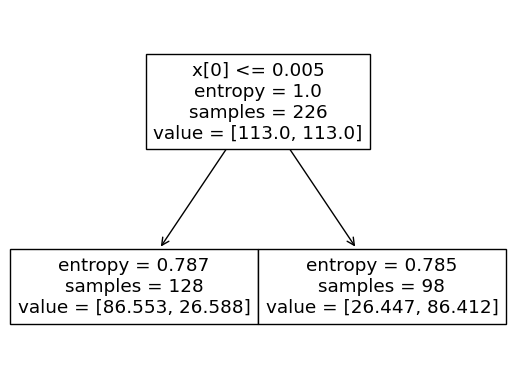

In [ ]:
from tf_chpvk_pv.modeling.train import *
from pathlib import Path
from tf_chpvk_pv.config import DATA_DIR, RESULTS_DIR

df_acc_old_path = RESULTS_DIR / 'Ch_weights - tolerance factors accuracy for several operations.csv'

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso('')

features_path = DATA_DIR / 'features_space/features/'


#df_acc_old = pd.read_csv(df_acc_old_path)
df_acc_old = pd.DataFrame()
#print(df_acc_old)

tfs = ['t', 'tau', 't_jess']
tf_tresh = [2, 1, 2]
df_acc =pd.DataFrame()
clfs = {}
t_sisso_expressions = {}

for tf, tresh in zip(tfs, tf_tresh):
    df_acc, clf_t = test_tolerance_factor_Ch(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=tresh)
    clfs[tf] = clf_t

for feat in files:
    #check that the tree file doesn't exist
    idx = int(feat.split('/')[-1].split('.csv')[0].split('_')[-1])

    col = 't_sisso_' + str(idx)
    
    re_do = False

    if col in df_acc_old.columns:
        no_nan_values = df_acc_old[col].isna().sum()
        if no_nan_values == 0:
            print('Tree with operations idx = %s already exists' % str(idx))
            continue
        else:
            print('Tree with operations idx = %s has %s missing values' % (str(idx), no_nan_values))
            re_do = True
    else:
        re_do = True

    if re_do:
        try:
            tf = 't_sisso_' + str(idx)
            df = pd.read_csv(features_path / feat)
            t_sisso_expression = train_tree_sis_features_Ch(features_path / feat)
            train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression, idx)
            df_acc, clf_t = test_tolerance_factor_Ch(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=1)
            clfs[tf] = clf_t
        except Exception as e:
            print(e)
            print('Error in %s' % feat)
            break

In [5]:
from tf_chpvk_pv.config import RESULTS_DIR

df_acc_old_path = RESULTS_DIR / '251219_Ch_weights - tolerance factors accuracy for several operations3-turnley.csv'

if df_acc_old_path.exists():

    df_acc_old = pd.read_csv(df_acc_old_path)
    df_acc_old.set_index('Unnamed: 0', inplace=True)
    df_acc_old.index.name = None

    for col in df_acc.columns:
        if col not in df_acc_old.columns:
            
            df_acc_old[col] = df_acc[col]
        else:
            no_nan_values = df_acc_old[col].isna().sum()
            if no_nan_values > 0:
                df_acc_old[col] = df_acc[col]

    for col in df_acc_old.columns:
        if 'Unnamed' in col:
            df_acc_old.drop(col, axis=1, inplace=True)
    
    df_acc_old.to_csv(df_acc_old_path)

else:
    df_acc.to_csv(df_acc_old_path)

NameError: name 'df_acc' is not defined

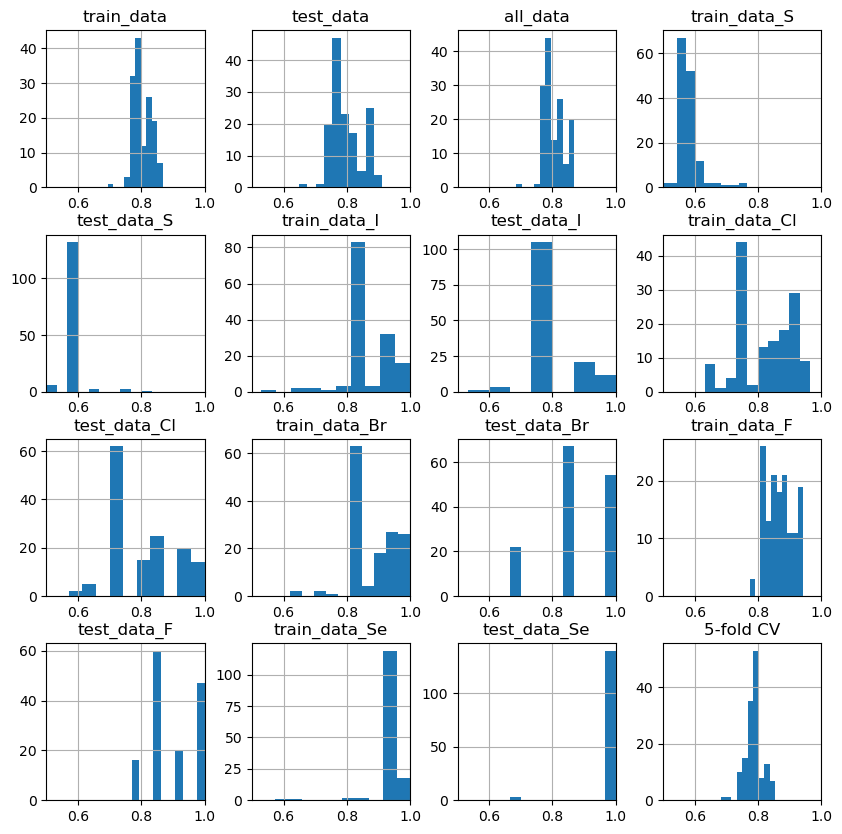

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from tf_chpvk_pv.config import RESULTS_DIR

df_acc_old_path = RESULTS_DIR / 'Ch_weights - tolerance factors accuracy for several operations3-turnley.csv'

df = pd.read_csv(df_acc_old_path)
df.set_index('Unnamed: 0', inplace=True)


axs = df[[x for x in df.columns if 't_sisso' in x]].T.hist(figsize=(10, 10))
for ax in axs.flatten():
    ax.set_xlim(0.5, 1)
plt.show()

In [13]:
df[[x for x in df.columns if 't_sisso' in x]].max(axis=1)

Unnamed: 0
train_data       0.867257
test_data        0.912281
all_data         0.869258
train_data_S     0.765957
test_data_S      0.833333
train_data_I     1.000000
test_data_I      1.000000
train_data_Cl    0.964912
test_data_Cl     1.000000
train_data_Br    1.000000
test_data_Br     1.000000
train_data_F     0.943396
test_data_F      1.000000
train_data_Se    1.000000
test_data_Se     1.000000
5-fold CV        0.853623
dtype: float64

In [14]:
df.T.sort_values('test_data', ascending=False).head(20)

Unnamed: 0   train_data  test_data  all_data  train_data_S  test_data_S  \
t_sisso_82     0.853982   0.912281  0.865724      0.574468     0.583333   
t_sisso_11     0.845133   0.894737  0.855124      0.595745     0.666667   
t_sisso_14     0.845133   0.894737  0.855124      0.744681     0.750000   
t_sisso_12     0.853982   0.894737  0.862191      0.574468     0.583333   
t_sisso_105    0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_108    0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_106    0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_98     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_107    0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_16     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_96     0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_97     0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_102    0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_52     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_101    0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_93     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_13     0.827434   0.877193  0.837456      0.574468     0.583333   
t_sisso_25     0.840708   0.877193  0.848057      0.595745     0.583333   
t_sisso_67     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_87     0.849558   0.877193  0.855124      0.574468     0.583333   

Unnamed: 0   train_data_I  test_data_I  train_data_Cl  test_data_Cl  \
t_sisso_82       0.970588     1.000000       0.912281      1.000000   
t_sisso_11       0.823529     0.888889       0.929825      0.928571   
t_sisso_14       0.794118     0.888889       0.912281      0.857143   
t_sisso_12       0.970588     1.000000       0.947368      1.000000   
t_sisso_105      0.941176     1.000000       0.929825      1.000000   
t_sisso_108      0.941176     1.000000       0.929825      1.000000   
t_sisso_106      1.000000     0.888889       0.947368      0.928571   
t_sisso_98       0.941176     1.000000       0.929825      1.000000   
t_sisso_107      0.941176     1.000000       0.929825      1.000000   
t_sisso_16       0.941176     1.000000       0.929825      1.000000   
t_sisso_96       1.000000     0.888889       0.947368      0.928571   
t_sisso_97       1.000000     0.888889       0.947368      0.928571   
t_sisso_102      0.941176     1.000000       0.929825      1.000000   
t_sisso_52       0.941176     1.000000       0.929825      1.000000   
t_sisso_101      1.000000     0.888889       0.947368      0.928571   
t_sisso_93       0.941176     1.000000       0.929825      1.000000   
t_sisso_13       0.882353     0.888889       0.894737      0.928571   
t_sisso_25       0.941176     0.777778       0.912281      1.000000   
t_sisso_67       0.970588     0.777778       0.947368      1.000000   
t_sisso_87       0.941176     1.000000       0.929825      1.000000   

Unnamed: 0   train_data_Br  test_data_Br  train_data_F  test_data_F  \
t_sisso_82        1.000000           1.0      0.886792     1.000000   
t_sisso_11        0.952381           1.0      0.905660     1.000000   
t_sisso_14        1.000000           1.0      0.849057     1.000000   
t_sisso_12        0.952381           1.0      0.867925     0.923077   
t_sisso_105       1.000000           1.0      0.867925     0.846154   
t_sisso_108       1.000000           1.0      0.867925     0.846154   
t_sisso_106       0.952381           1.0      0.886792     1.000000   
t_sisso_98        1.000000           1.0      0.867925     0.846154   
t_sisso_107       1.000000           1.0      0.867925     0.846154   
t_sisso_16        1.000000           1.0      0.867925     0.846154   
t_sisso_96        0.952381           1.0      0.886792     1.000000   
t_sisso_97        0.952381           1.0      0.886792     1.000000   
t_sisso_1

In [15]:
df.T.sort_values('test_data_S', ascending=False).head(5)

Unnamed: 0  train_data  test_data  all_data  train_data_S  test_data_S  \
t_sisso_88    0.805310   0.754386  0.795053      0.638298     0.833333   
t_sisso_17    0.774336   0.789474  0.777385      0.702128     0.750000   
t_sisso_14    0.845133   0.894737  0.855124      0.744681     0.750000   
t_jess        0.743363   0.701754  0.734982      0.829787     0.666667   
t_sisso_45    0.840708   0.859649  0.844523      0.595745     0.666667   

Unnamed: 0  train_data_I  test_data_I  train_data_Cl  test_data_Cl  \
t_sisso_88      0.911765     0.666667       0.771930      0.571429   
t_sisso_17      0.705882     0.777778       0.824561      0.642857   
t_sisso_14      0.794118     0.888889       0.912281      0.857143   
t_jess          0.676471     0.888889       0.701754      0.571429   
t_sisso_45      0.882353     1.000000       0.929825      0.857143   

Unnamed: 0  train_data_Br  test_data_Br  train_data_F  test_data_F  \
t_sisso_88       0.857143      0.666667      0.849057     0.923077   
t_sisso_17       0.714286      0.833333      0.830189     0.923077   
t_sisso_14       1.000000      1.000000      0.849057     1.000000   
t_jess           0.761905      0.666667      0.792453     0.846154   
t_sisso_45       1.000000      1.000000      0.849057     0.846154   

Unnamed: 0  train_data_Se  test_data_Se  5-fold CV  
t_sisso_88       1.000000      1.000000   0.783092  
t_sisso_17       0.857143      1.000000   0.751981  
t_sisso_14       0.785714      1.000000   0.827246  
t_jess           0.571429      0.333333   0.725507  
t_sisso_45       0.928571      1.000000   0.782899

In [16]:
top_S_t_sisso = df.T.sort_values('test_data_S', ascending=False).head(5).index

In [17]:
df.T[df.T['test_data'] >= 0.89]

Unnamed: 0  train_data  test_data  all_data  train_data_S  test_data_S  \
t_sisso_14    0.845133   0.894737  0.855124      0.744681     0.750000   
t_sisso_82    0.853982   0.912281  0.865724      0.574468     0.583333   
t_sisso_11    0.845133   0.894737  0.855124      0.595745     0.666667   
t_sisso_12    0.853982   0.894737  0.862191      0.574468     0.583333   

Unnamed: 0  train_data_I  test_data_I  train_data_Cl  test_data_Cl  \
t_sisso_14      0.794118     0.888889       0.912281      0.857143   
t_sisso_82      0.970588     1.000000       0.912281      1.000000   
t_sisso_11      0.823529     0.888889       0.929825      0.928571   
t_sisso_12      0.970588     1.000000       0.947368      1.000000   

Unnamed: 0  train_data_Br  test_data_Br  train_data_F  test_data_F  \
t_sisso_14       1.000000           1.0      0.849057     1.000000   
t_sisso_82       1.000000           1.0      0.886792     1.000000   
t_sisso_11       0.952381           1.0      0.905660     1.000000   
t_sisso_12       0.952381           1.0      0.867925     0.923077   

Unnamed: 0  train_data_Se  test_data_Se  5-fold CV  
t_sisso_14       0.785714           1.0   0.827246  
t_sisso_82       0.928571           1.0   0.831498  
t_sisso_11       1.000000           1.0   0.818357  
t_sisso_12       0.928571           1.0   0.840580

In [18]:
top_t_sisso = df.T[df.T['test_data'] >= 0.89].index.values

In [19]:
top_t_sisso

array(['t_sisso_14', 't_sisso_82', 't_sisso_11', 't_sisso_12'],
      dtype=object)

{}
Classification tree f1 (for t) on the train set: 0.747788.
Classification tree f1 (for t) on the train set (5 fold CV): 0.654770.
Classification tree f1 (for t) on the test set: 0.596491.
0.851217 < t < 0.953118 indicates stable perovskites.
Adding column rA_rB_ratio to train_df_global
Adding column t to train_df_global
Adding column tau to train_df_global
Adding column t_jess to train_df_global
2025-12-19 20:36:29.220 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|((rA_rX_ratio + rB_rX_ratio) + (|rB_rX_ratio - log_rA_rB_ratio|)) - (rA_rX_ratio**3)|)
Classification tree f1 (for t_sisso_14) on the train set: 0.845133.
Classification tree f1 (for t_sisso_14) on the train set (5 fold CV): 0.765626.
Classification tree f1 (for t_sisso_14) on the test set: 0.894737.
t_sisso_14 < 0.845501 indicates stable perovskites.
Adding column t_sisso_14 to train_df_global
2025-12-19 20:36:50.632

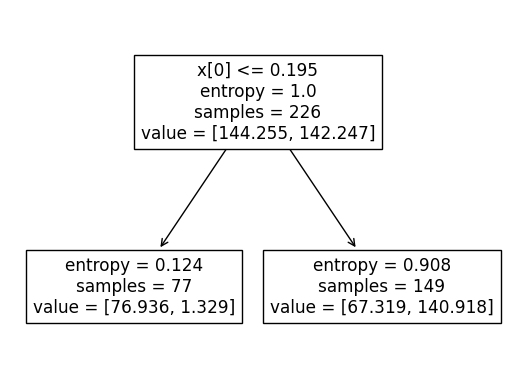

In [21]:
from tf_chpvk_pv.config import DATA_DIR, INTERIM_DATA_DIR
from tf_chpvk_pv.modeling.train import test_tolerance_factor_Ch, evaluate_t_sisso, train_tree_sis_features_Ch
import pickle

features_path = DATA_DIR / 'features_space/features/'

tfs = ['t', 'tau', 't_jess'] + top_t_sisso.tolist() + top_S_t_sisso.tolist()
tf_tresh = [2, 1, 2] + [1]*( top_t_sisso.shape[0] + top_S_t_sisso.shape[0])
df_acc =pd.DataFrame()
clfs = {}

tolerance_factor_path = INTERIM_DATA_DIR / '251219_ch_tolerance_factors_ops3 - turnley.pkl'

if tolerance_factor_path.exists():
    with open(tolerance_factor_path, 'rb') as file:
        tolerance_factor_dict_global = pickle.load(file)
else:
    tolerance_factor_dict_global = {}

print(tolerance_factor_dict_global)

train_df_global = train_df.copy()
test_df_global = test_df.copy()

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso('')

for tf, tresh in zip(tfs, tf_tresh):

    if tf not in tolerance_factor_dict_global.keys():
        
        if 'sisso' in tf:
            idx = int(tf.split('_')[-1])
            t_sisso_expression = train_tree_sis_features_Ch(features_path / ('features_sisso_' + str(idx) + '.csv'))
            train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression, idx)
        df_acc, clf_t = test_tolerance_factor_Ch(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=tresh)
        for key in tolerance_factor_dict.keys():
            if key not in tolerance_factor_dict_global.keys():
                tolerance_factor_dict_global[key] = tolerance_factor_dict[key]
        for col in train_df.columns:
            if col not in train_df_global.columns:
                train_df_global[col] = train_df[col]
                print('Adding column %s to train_df_global' % col)
            if col not in test_df_global.columns:
                test_df_global[col] = test_df[col]
        clfs[tf] = clf_t
    else:
        
        if 'sisso' in tf:
            idx = int(tf.split('_')[-1])
            t_sisso_expression = tolerance_factor_dict_global[tf][0]
            #print('Using existing tree for %s' % tf)
            print(t_sisso_expression)
            train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression, idx)
            #print(train_df.columns)
            for col in train_df.columns:
                if col not in train_df_global.columns:
                    train_df_global[col] = train_df[col]
                    print('Adding column %s to train_df_global' % col)
                if col not in test_df_global.columns:
                    test_df_global[col] = test_df[col]
            #clfs[tf] = clf_t


with open(tolerance_factor_path, 'wb') as file:
    pickle.dump(tolerance_factor_dict_global, file)

train_df = train_df_global
test_df = test_df_global

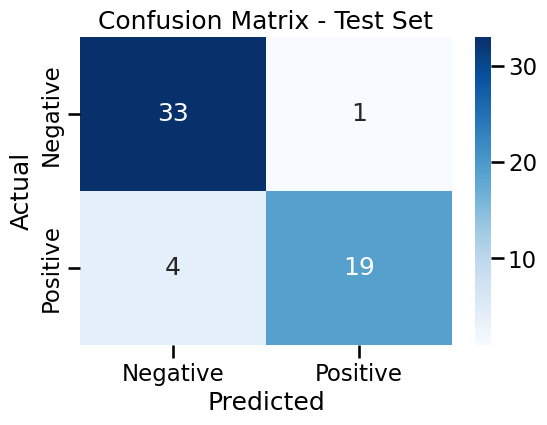

In [32]:
from tf_chpvk_pv.plots import confusion_matrix_plot

test_trial = test_df.copy()

t_sisso = 't_sisso_14'

test_trial.rename(columns={t_sisso:'t_sisso',
                           'p_' + t_sisso:'p_t_sisso'}, inplace=True)

confusion_matrix_plot(test_trial)

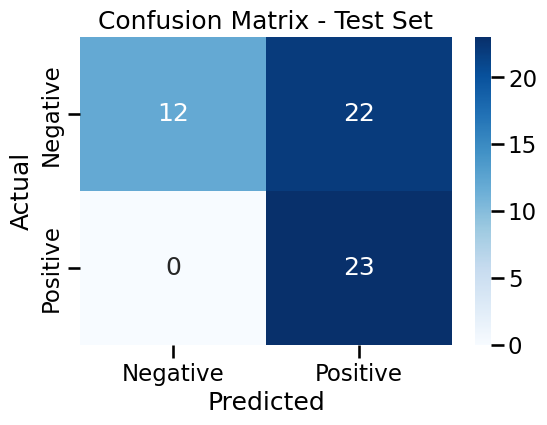

In [33]:
test_trial = test_df.copy()

t_sisso = 't_sisso_82'

test_trial.rename(columns={t_sisso:'t_sisso',
                           'p_' + t_sisso:'p_t_sisso'}, inplace=True)

confusion_matrix_plot(test_trial)

In [22]:
for t in tolerance_factor_dict_global.keys():
    try:
        th = tolerance_factor_dict_global[t][1]
        exp = tolerance_factor_dict_global[t][0]
        print(t, exp, th)
    except:
        continue

t (rA+rX)/(1.41421*(rB+rX)) [0.8512169420719147, 0.9531176090240479]
tau rX/rB-nA*(nA-rA_rB_ratio/log(rA_rB_ratio)) 4.18
t_sisso_14 abs(((rA_rX_ratio + rB_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - (rA_rX_ratio**3)) 0.8455010652542114
t_sisso_82 abs(abs((rA_rX_ratio * rB_rX_ratio) - exp(rB_rX_ratio)) - abs(abs(rB_rX_ratio - log_rA_rB_ratio) - rA_rX_ratio)) 0.7350591421127319
t_sisso_11 (abs((rB_rX_ratio + chi_BX_ratio) - exp(rB_rX_ratio)) + abs(abs(rB_rX_ratio - log_rA_rB_ratio) - (chi_BX_ratio + log_rA_rB_ratio))) 1.422353446483612
t_sisso_12 abs(((1.0 / rA_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - abs(abs(rB_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio + log_rA_rB_ratio))) 0.4098380506038666
t_sisso_88 abs(abs(abs(rB_rX_ratio - log_rA_rB_ratio) - exp(chi_BX_ratio)) - abs((log_rA_rB_ratio / chi_BX_ratio) - chi_diff)) 1.5189454555511475
t_sisso_17 (((rB_rX_ratio / chi_BX_ratio) + (rB_rX_ratio * chi_BX_ratio)) / ((rA_rX_ratio / chi_BX_ratio) + (rA_rX_ratio / log_rA_rB_ratio

In [23]:
from tf_chpvk_pv.plots import platt_scaling_plot
from tf_chpvk_pv.config import RESULTS_DIR, INTERIM_DATA_DIR, FIGURES_DIR
import os

from tf_chpvk_pv.modeling.train import train_platt_scaling

clf2_platt_path = INTERIM_DATA_DIR / 'Ch_clf2_platt3-turnley.pkl'

clf2_platt = {}

for t in tolerance_factor_dict_global.keys():
    if 'sisso' in t:
        idx = int(t.split('_')[-1])
        print(t)
        try:
            train_df, test_df, clf2_sisso = train_platt_scaling(train_df, test_df, clf_t=clfs[t], t=t,)
            clf2_platt[t] = clf2_sisso

            train_input_path = RESULTS_DIR / 'processed_chpvk_train_dataset.csv'
            test_input_path = RESULTS_DIR / 'processed_chpvk_test_dataset.csv'
            concat_input_path = RESULTS_DIR / 'processed_chpvk_concat_dataset.csv'
            if concat_input_path.exists():
                os.remove(concat_input_path)
            tolerance_dict_path = INTERIM_DATA_DIR / 'ch_tolerance_factors_ops3 - turnley.pkl'
            txt_output = 'ch_diff_ops3-turnley_platt_scaling_plot_t_sisso_' + str(idx) + '.png'
            output_path = FIGURES_DIR / txt_output

            platt_scaling_plot(t, train_input_path, test_input_path,concat_input_path, tolerance_dict_path, output_path)
        except Exception as e:
            print(f"Error occurred while processing {t}: {e}")
            continue

with open(clf2_platt_path, 'wb') as file:
    pickle.dump(clf2_platt, file)

t_sisso_14
2025-12-19 20:39:23.185 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-19 20:39:23.251 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.
Error occurred while processing t_sisso_14: No module named 'numpy._core'
t_sisso_82
2025-12-19 20:39:23.259 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-19 20:39:23.279 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.
Error occurred while processing t_sisso_82: No module named 'numpy._core'
t_sisso_11
2025-12-19 20:39:23.284 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-19 20:39:23.307 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.
Error occurred while processing t_sisso_11: No module named 'numpy._core

In [25]:
df

t_sisso         t       tau    t_jess  t_sisso_78  t_sisso_27  \
Unnamed: 0                                                                     
train_data         NaN  0.747788  0.805310  0.743363    0.796460    0.827434   
test_data          NaN  0.596491  0.719298  0.701754    0.824561    0.789474   
all_data           NaN  0.717314  0.787986  0.734982    0.802120    0.819788   
train_data_S       NaN  0.787234  0.659574  0.829787    0.553191    0.574468   
test_data_S        NaN  0.583333  0.416667  0.666667    0.583333    0.500000   
train_data_I       NaN  0.794118  0.852941  0.676471    0.852941    0.882353   
test_data_I        NaN  0.555556  0.777778  0.888889    0.777778    0.666667   
train_data_Cl      NaN  0.842105  0.929825  0.701754    0.859649    0.947368   
test_data_Cl       NaN  0.642857  0.928571  0.571429    0.928571    0.928571   
train_data_Br      NaN  0.809524  0.666667  0.761905    0.952381    1.000000   
test_data_Br       NaN  0.666667  0.500000  0.666667    1.000000    1.000000   
train_data_F       NaN  0.547170  0.886792  0.792453    0.811321    0.773585   
test_data_F        NaN  0.615385  1.000000  0.846154    0.846154    0.846154   
train_data_Se      NaN  0.785714  0.571429  0.571429    0.928571    1.000000   
test_data_Se       NaN  0.333333  0.000000  0.333333    1.000000    1.000000   
5-fold CV          NaN  0.738647  0.783092  0.725507    0.760966    0.822705   

               t_sisso_116  t_sisso_91  t_sisso_43  t_sisso_29  ...  \
Unnamed: 0                                                      ...   
train_data        0.787611    0.756637    0.787611    0.800885  ...   
test_data         0.754386    0.824561    0.736842    0.789474  ...   
all_data          0.780919    0.770318    0.777385    0.798587  ...   
train_data_S      0.553191    0.531915    0.553191    0.553191  ...   
test_data_S       0.583333    0.583333    0.583333    0.583333  ...   
train_data_I      0.852941    0.647059    0.852941    0.852941  ...   
test_data_I       0.777778    0.777778    0.777778    0.777778  ...   
train_data_Cl     0.754386    0.877193    0.754386    0.894737  ...   
test_data_Cl      0.714286    0.857143    0.714286    0.714286  ...   
train_data_Br     0.809524    0.904762    0.809524    0.809524  ...   
test_data_Br      0.833333    1.000000    0.833333    0.833333  ...   
train_data_F      0.943396    0.773585    0.943396    0.849057  ...   
test_data_F       0.846154    0.923077    0.769231    1.000000  ...   
train_data_Se     0.928571    1.000000    0.928571    0.928571  ...   
test_data_Se      1.000000    1.000000    1.000000    1.000000  ...   
5-fold CV         0.787729    0.742802    0.787729    0.800773  ...   

               t_sisso_65  t_sisso_15  t_sisso_90  t_sisso_140  t_sisso_12  \
Unnamed: 0                                                                   
train_data       0.818584    0.849558    0.809735     0.783186    0.853982   
test_data        0.842105    0.859649    0.807018     0.754386    0.894737   
all_data         0.823322    0.851590    0.809187     0.777385    0.862191   
train_data_S     0.553191    0.574468    0.489362     0.553191    0.574468   
test_data_S      0.583333    0.583333    0.583333     0.583333    0.583333   
train_data_I     0.852941    0.911765    0.941176     0.852941    0.970588   
test_data_I      0.777778    0.888889    0.888889     0.777778    1.000000   
train_data_Cl    0.912281    0.929825    0.894737     0.754386    0.947368   
test_data_Cl     0.857143    0.857143    0.642857     0.714286    1.000000   
train_data_Br    0.809524    1.000000    0.952381     0.809524    0.952381   
test_data_Br     1.000000    1.000000    1.000000     0.833333    1.000000   
train_data_F     0.905660    0.886792    0.811321     0.924528    0.867925   
test_data_F      1.000000    1.000000    1.000000     0.846154    0.923077   
train_data_Se    0.928571    0.928571    1.000000     0.928571    0.928571   
test_data_Se     1.000000    1.000000    1.0000

In [24]:
test_idx = [x for x in df.index if 'test' in x]
tfs_ = ['t', 'tau', 't_jess'] + top_t_sisso.tolist() + top_S_t_sisso.tolist()
display(df.loc[test_idx, tfs_])

t       tau    t_jess  t_sisso_14  t_sisso_82  \
Unnamed: 0                                                           
test_data     0.596491  0.719298  0.701754    0.894737    0.912281   
test_data_S   0.583333  0.416667  0.666667    0.750000    0.583333   
test_data_I   0.555556  0.777778  0.888889    0.888889    1.000000   
test_data_Cl  0.642857  0.928571  0.571429    0.857143    1.000000   
test_data_Br  0.666667  0.500000  0.666667    1.000000    1.000000   
test_data_F   0.615385  1.000000  0.846154    1.000000    1.000000   
test_data_Se  0.333333  0.000000  0.333333    1.000000    1.000000   

              t_sisso_11  t_sisso_12  t_sisso_88  t_sisso_17  t_sisso_14  \
Unnamed: 0                                                                 
test_data       0.894737    0.894737    0.754386    0.789474    0.894737   
test_data_S     0.666667    0.583333    0.833333    0.750000    0.750000   
test_data_I     0.888889    1.000000    0.666667    0.777778    0.888889   
test_data_Cl    0.928571    1.000000    0.571429    0.642857    0.857143   
test_data_Br    1.000000    1.000000    0.666667    0.833333    1.000000   
test_data_F     1.000000    0.923077    0.923077    0.923077    1.000000   
test_data_Se    1.000000    1.000000    1.000000    1.000000    1.000000   

                t_jess  t_sisso_45  
Unnamed: 0                          
test_data     0.701754    0.859649  
test_data_S   0.666667    0.666667  
test_data_I   0.888889    1.000000  
test_data_Cl  0.571429    0.857143  
test_data_Br  0.666667    1.000000  
test_data_F   0.846154    0.846154  
test_data_Se  0.333333    1.000000

In [27]:
from tf_chpvk_pv.dataset import generate_compositions
from tf_chpvk_pv.modeling.predict import check_stable_compositions
from tf_chpvk_pv.config import INTERIM_DATA_DIR

new_tolerance_dict_path = INTERIM_DATA_DIR / '251219_ch_tolerance_factors_ops3 - turnley.pkl'

element_selection_A = ["Ba", "Eu", "Pb", "Sr", "Ca", "Sn", "Cd", "Cu", "Mg",
                      "Zn", "Ge", "La", "Pr", "Ce", "Nd", "Yb", "Gd", "Sm", "Y",
                      "Dy", "Ho", "Er", "Tm", "Lu", "Sc", "Tl", "Bi"]

elements_selection_B = ["Si", "Ge", "V", "Rh", "Ti", "Ru", "Mo", "Ta", "Nb", "Hf",
                        "Zr", "Tb", "Pt", "Ce", "U", "Pd", "Ni", "Co", "Ga", "Al",
                        "Fe", "Cr", "In", "Mn", "Sc", "Lu", "Tm", "Er", "Ho", "Y",
                        "Yb"]


elements_selection = element_selection_A + elements_selection_B

possible_oxidation_states = [2.0, 3.0, 4.0] #3, 4] #for A and B elements

df_generated_comp = generate_compositions(elements_selection, 
                                          possible_oxidation_states, 
                                          dict_tol_factors_path=new_tolerance_dict_path,
                                          use_turnley_radii=True).dropna()

2025-12-19 20:41:12.697 | INFO     | tf_chpvk_pv.dataset:generate_compositions:298 - Generating valid compositions...
Invalid composition: CuBiS3
Invalid composition: CuBiSe3
Invalid composition: VCuS3
Invalid composition: VCuSe3
Invalid composition: CuRuS3
Invalid composition: CuRuSe3
Invalid composition: CuMoS3
Invalid composition: CuMoSe3
Invalid composition: TaCuS3
Invalid composition: TaCuSe3
Invalid composition: NbCuS3
Invalid composition: NbCuSe3
Invalid composition: CuPtS3
Invalid composition: CuPtSe3
Invalid composition: CrCuS3
Invalid composition: CrCuSe3
Invalid composition: TlVS3
Invalid composition: TlVSe3
Invalid composition: TlRuS3
Invalid composition: TlRuSe3
Invalid composition: TlMoS3
Invalid composition: TlMoSe3
Invalid composition: TaTlS3
Invalid composition: TaTlSe3
Invalid composition: NbTlS3
Invalid composition: NbTlSe3
Invalid composition: TlPtS3
Invalid composition: TlPtSe3
Invalid composition: UTlS3
Invalid composition: UTlSe3
Invalid composition: TlCrS3
Inval

According to t_sisso_14, 181 (13.00287356321839%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaPrS3', 'BaCeS3', 'BaHfS3', 'BaZrS3', 'BaUS3', 'BaUSe3', 'EuSnS3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuTlS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbSnS3', 'PbPrS3', 'PbCeS3', 'PbHfS3', 'PbZrS3', 'SrSnS3', 'SrPrS3', 'SrCeS3', 'SrHfS3', 'SrZrS3', 'SrUS3', 'SrUSe3', 'CaSnS3', 'CaCeS3', 'CaUSe3', 'SnGeS3', 'SnGeSe3', 'SnVS3', 'SnVSe3', 'SnRhS3', 'SnRhSe3', 'SnAlSe3', 'CdCeS3', 'CdUSe3', 'CuPrS3', 'CuPrSe3', 'CuCeSe3', 'CuScSe3', 'CuTlSe3', 'CuHfS3', 'CuHfSe3', 'CuZrS3', 'CuZrSe3', 'MgPrS3', 'MgCeS3', 'MgHfS3', 'MgZrS3', 'ZnTaS3', 'ZnTaSe3', 'ZnNbS3', 'ZnNbSe3', 'ZnTbS3', 'ZnTbSe3', 'LaScS3', 'LaTlS3', 'LaHfS3', 'LaZrS3', 'LaTbS3', 'LaTbSe3', 'LaInS3', 'LaInSe3', 'PrLuSe3', 'PrScS3', 'PrTlS3', 'PrTbS3', 'PrTb

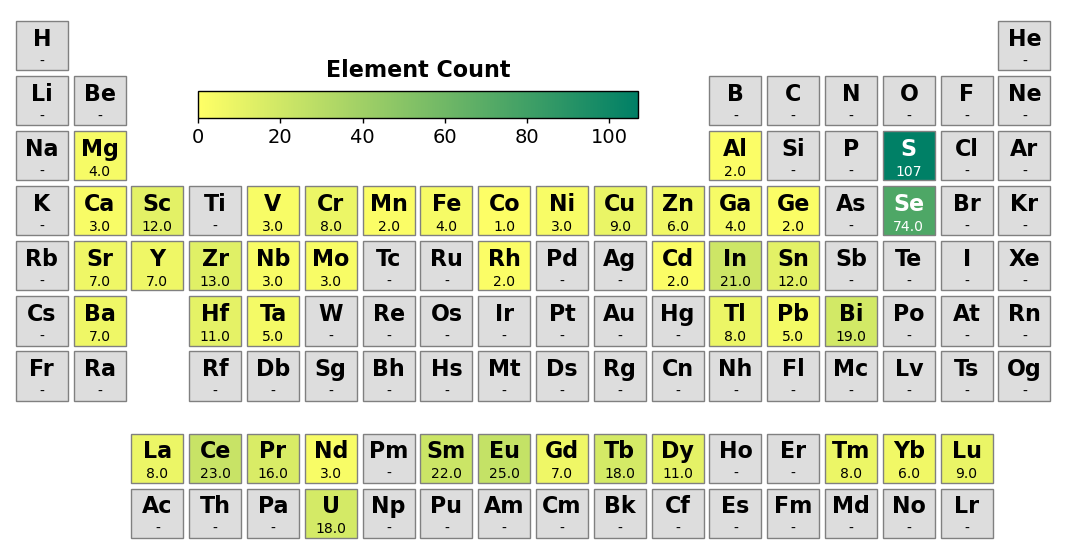

In [28]:
from tf_chpvk_pv.plots import graph_periodic_table

t = 't_sisso_14'

stable_candidates_t_sisso, df_out = check_stable_compositions(t, tolerance_factor_dict_path=new_tolerance_dict_path)
graph_periodic_table(stable_candidates_t_sisso, t=t)

According to tau, 780 (55.873925501432666%) compositions are predicted to be stable as perovskites:
['BaPbS3', 'BaPbSe3', 'BaSnS3', 'BaSnSe3', 'BaPrS3', 'BaPrSe3', 'BaCeS3', 'BaCeSe3', 'BaTiS3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfS3', 'BaHfSe3', 'BaZrS3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaUS3', 'EuPbS3', 'EuSnS3', 'EuCuS3', 'EuCuSe3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuGdS3', 'EuGdSe3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuScSe3', 'EuTlS3', 'EuTlSe3', 'EuRhS3', 'EuRhSe3', 'EuTiS3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuNbS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuNiS3', 'EuNiSe3', 'EuCoS3', 'EuCoSe3', 'EuGaS3', 'EuGaSe3', 'EuAlS3', 'EuAlSe3', 'EuFeS3', 'EuFeSe3', 'EuCrS3', 'EuCrSe3', 'EuInS3', 'EuInSe3', 'EuMnS3', 'EuMnSe3', 'SrSnS3', 'SrSnSe3', 'SrPrS3', 'SrPrSe3', 'SrCeS3', 'SrCeSe3', 'SrTiS3', 'SrTaS3', 'SrTaSe3', 'SrNbS3', 'SrNbSe3', 'SrH

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


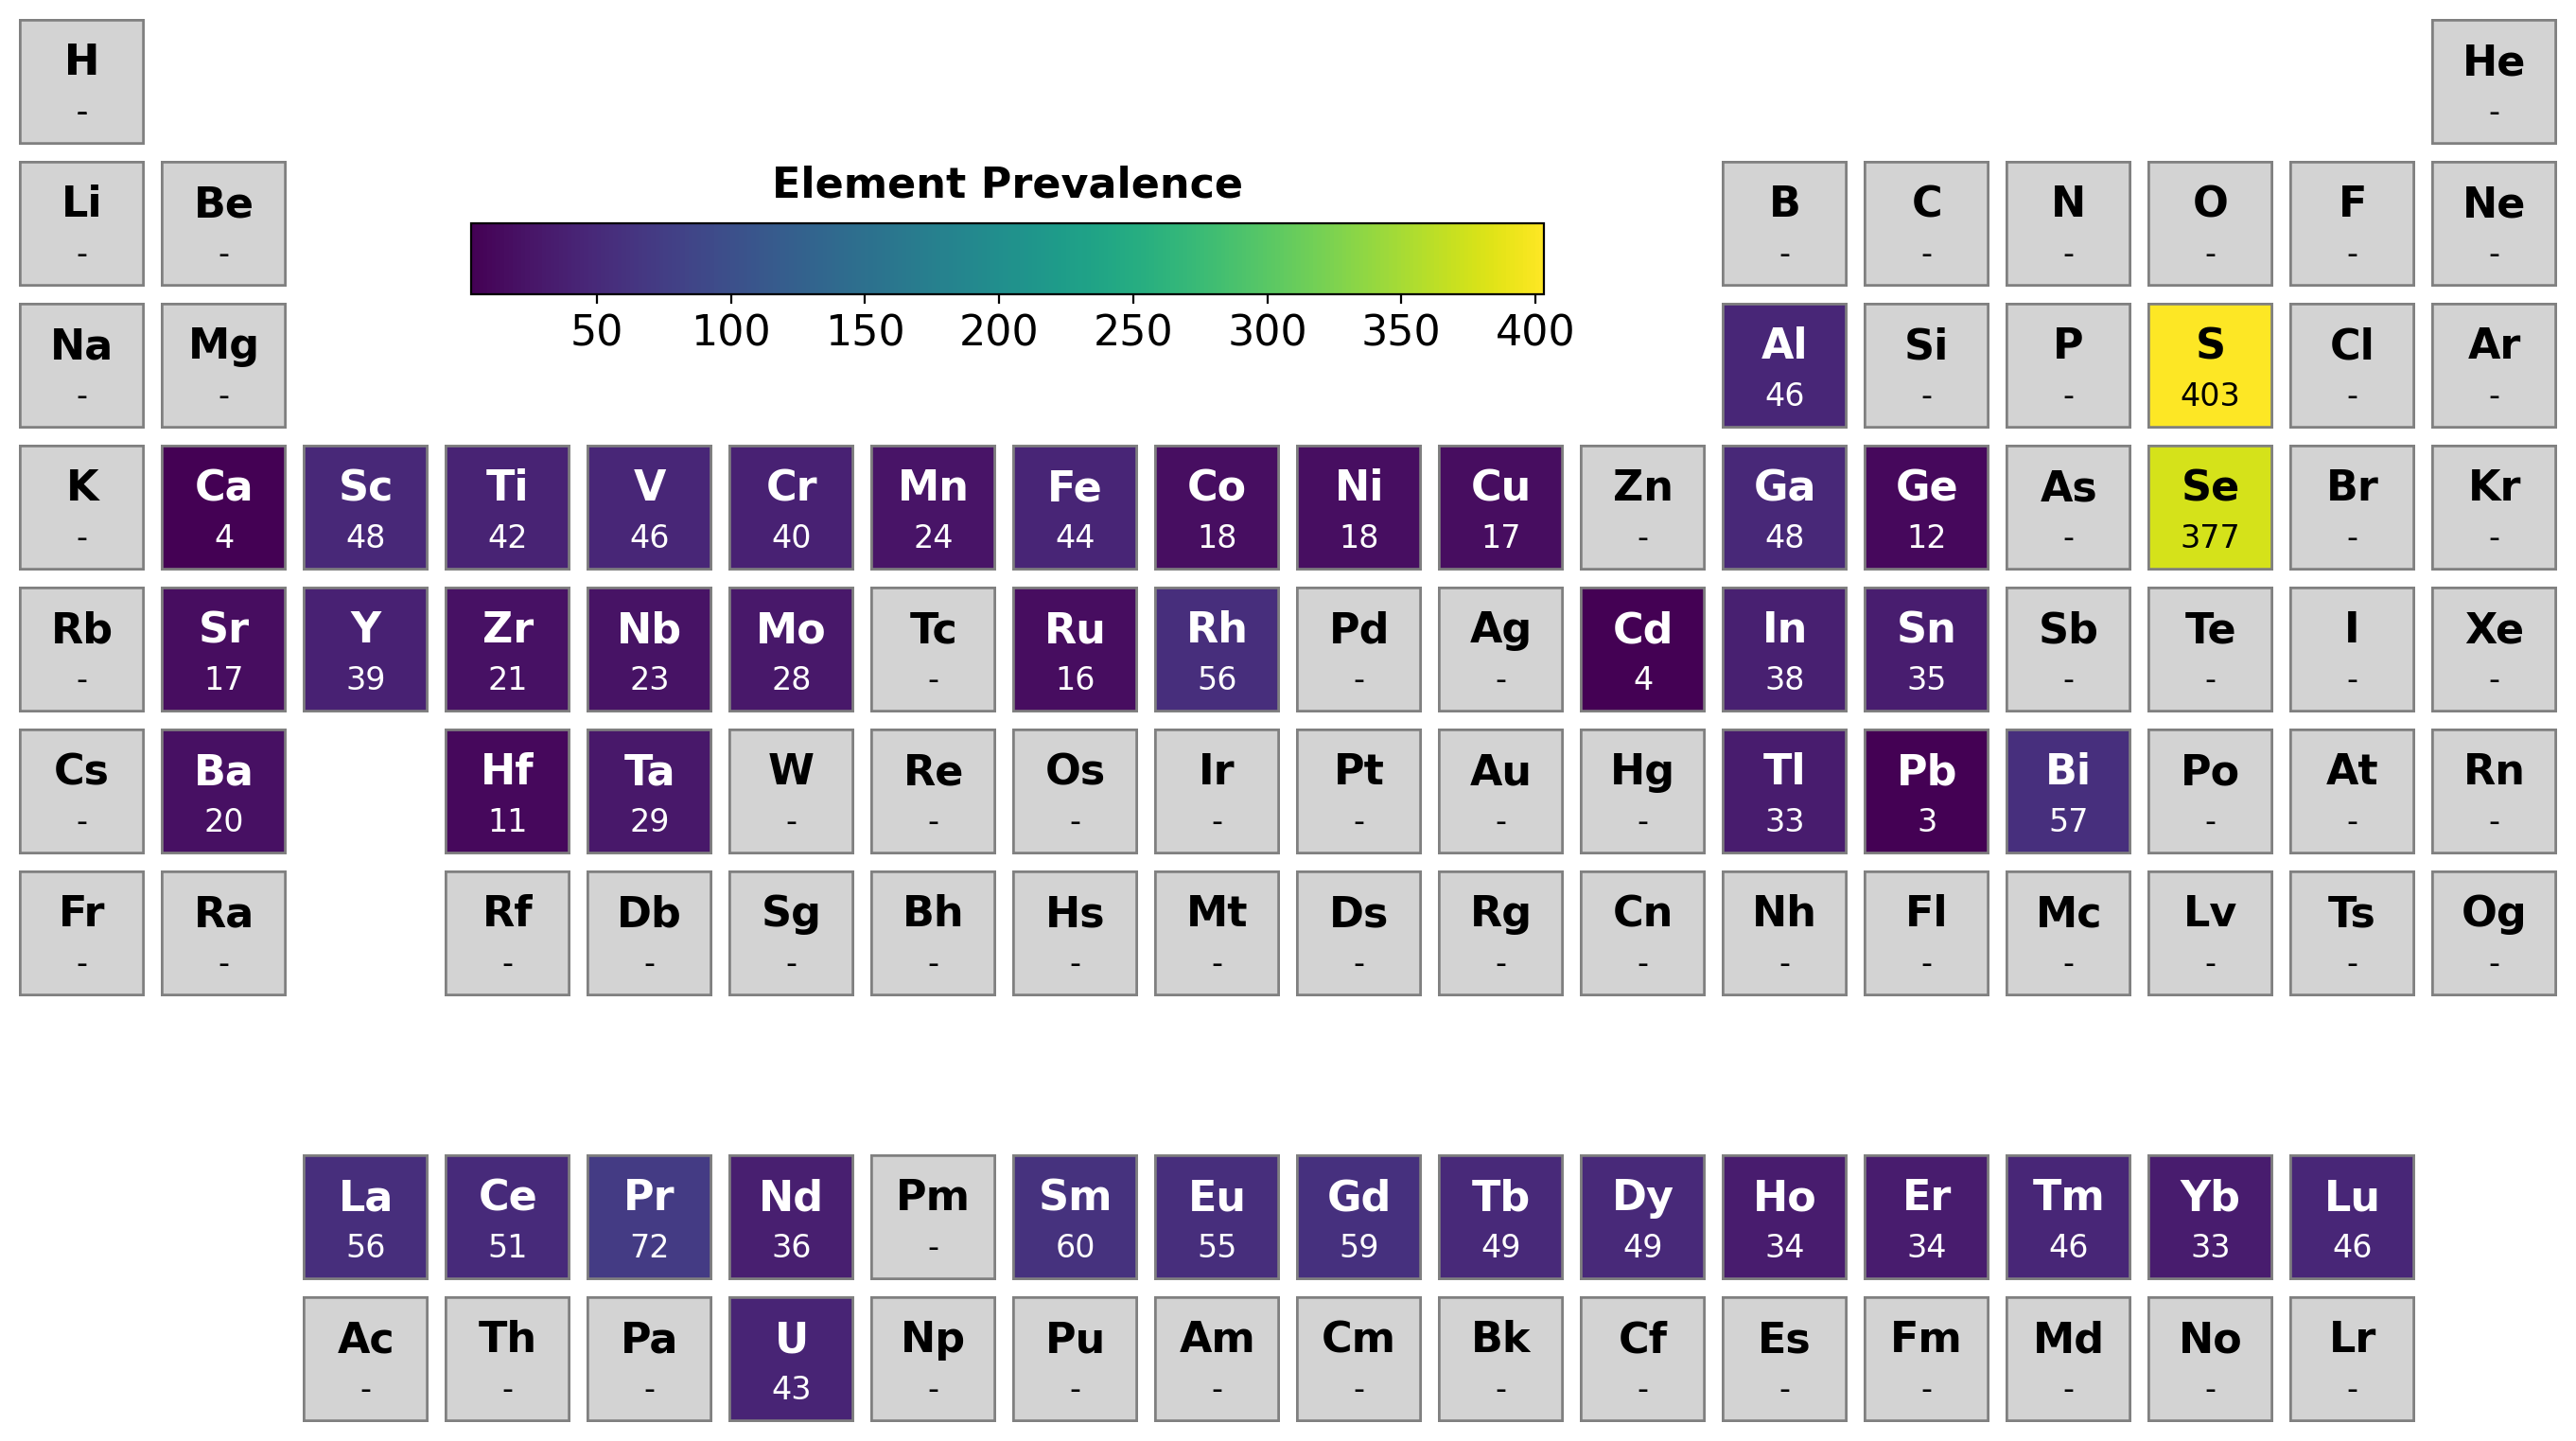

According to t_sisso_14, 181 (12.965616045845271%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaPrS3', 'BaCeS3', 'BaHfS3', 'BaZrS3', 'BaUS3', 'BaUSe3', 'EuSnS3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuTlS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbSnS3', 'PbPrS3', 'PbCeS3', 'PbHfS3', 'PbZrS3', 'SrSnS3', 'SrPrS3', 'SrCeS3', 'SrHfS3', 'SrZrS3', 'SrUS3', 'SrUSe3', 'CaSnS3', 'CaCeS3', 'CaUSe3', 'SnGeS3', 'SnGeSe3', 'SnVS3', 'SnVSe3', 'SnRhS3', 'SnRhSe3', 'SnAlSe3', 'CdCeS3', 'CdUSe3', 'CuPrS3', 'CuPrSe3', 'CuCeSe3', 'CuScSe3', 'CuTlSe3', 'CuHfS3', 'CuHfSe3', 'CuZrS3', 'CuZrSe3', 'MgPrS3', 'MgCeS3', 'MgHfS3', 'MgZrS3', 'ZnTaS3', 'ZnTaSe3', 'ZnNbS3', 'ZnNbSe3', 'ZnTbS3', 'ZnTbSe3', 'LaScS3', 'LaTlS3', 'LaHfS3', 'LaZrS3', 'LaTbS3', 'LaTbSe3', 'LaInS3', 'LaInSe3', 'PrLuSe3', 'PrScS3', 'PrTlS3', 'PrTbS3', 'PrT

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


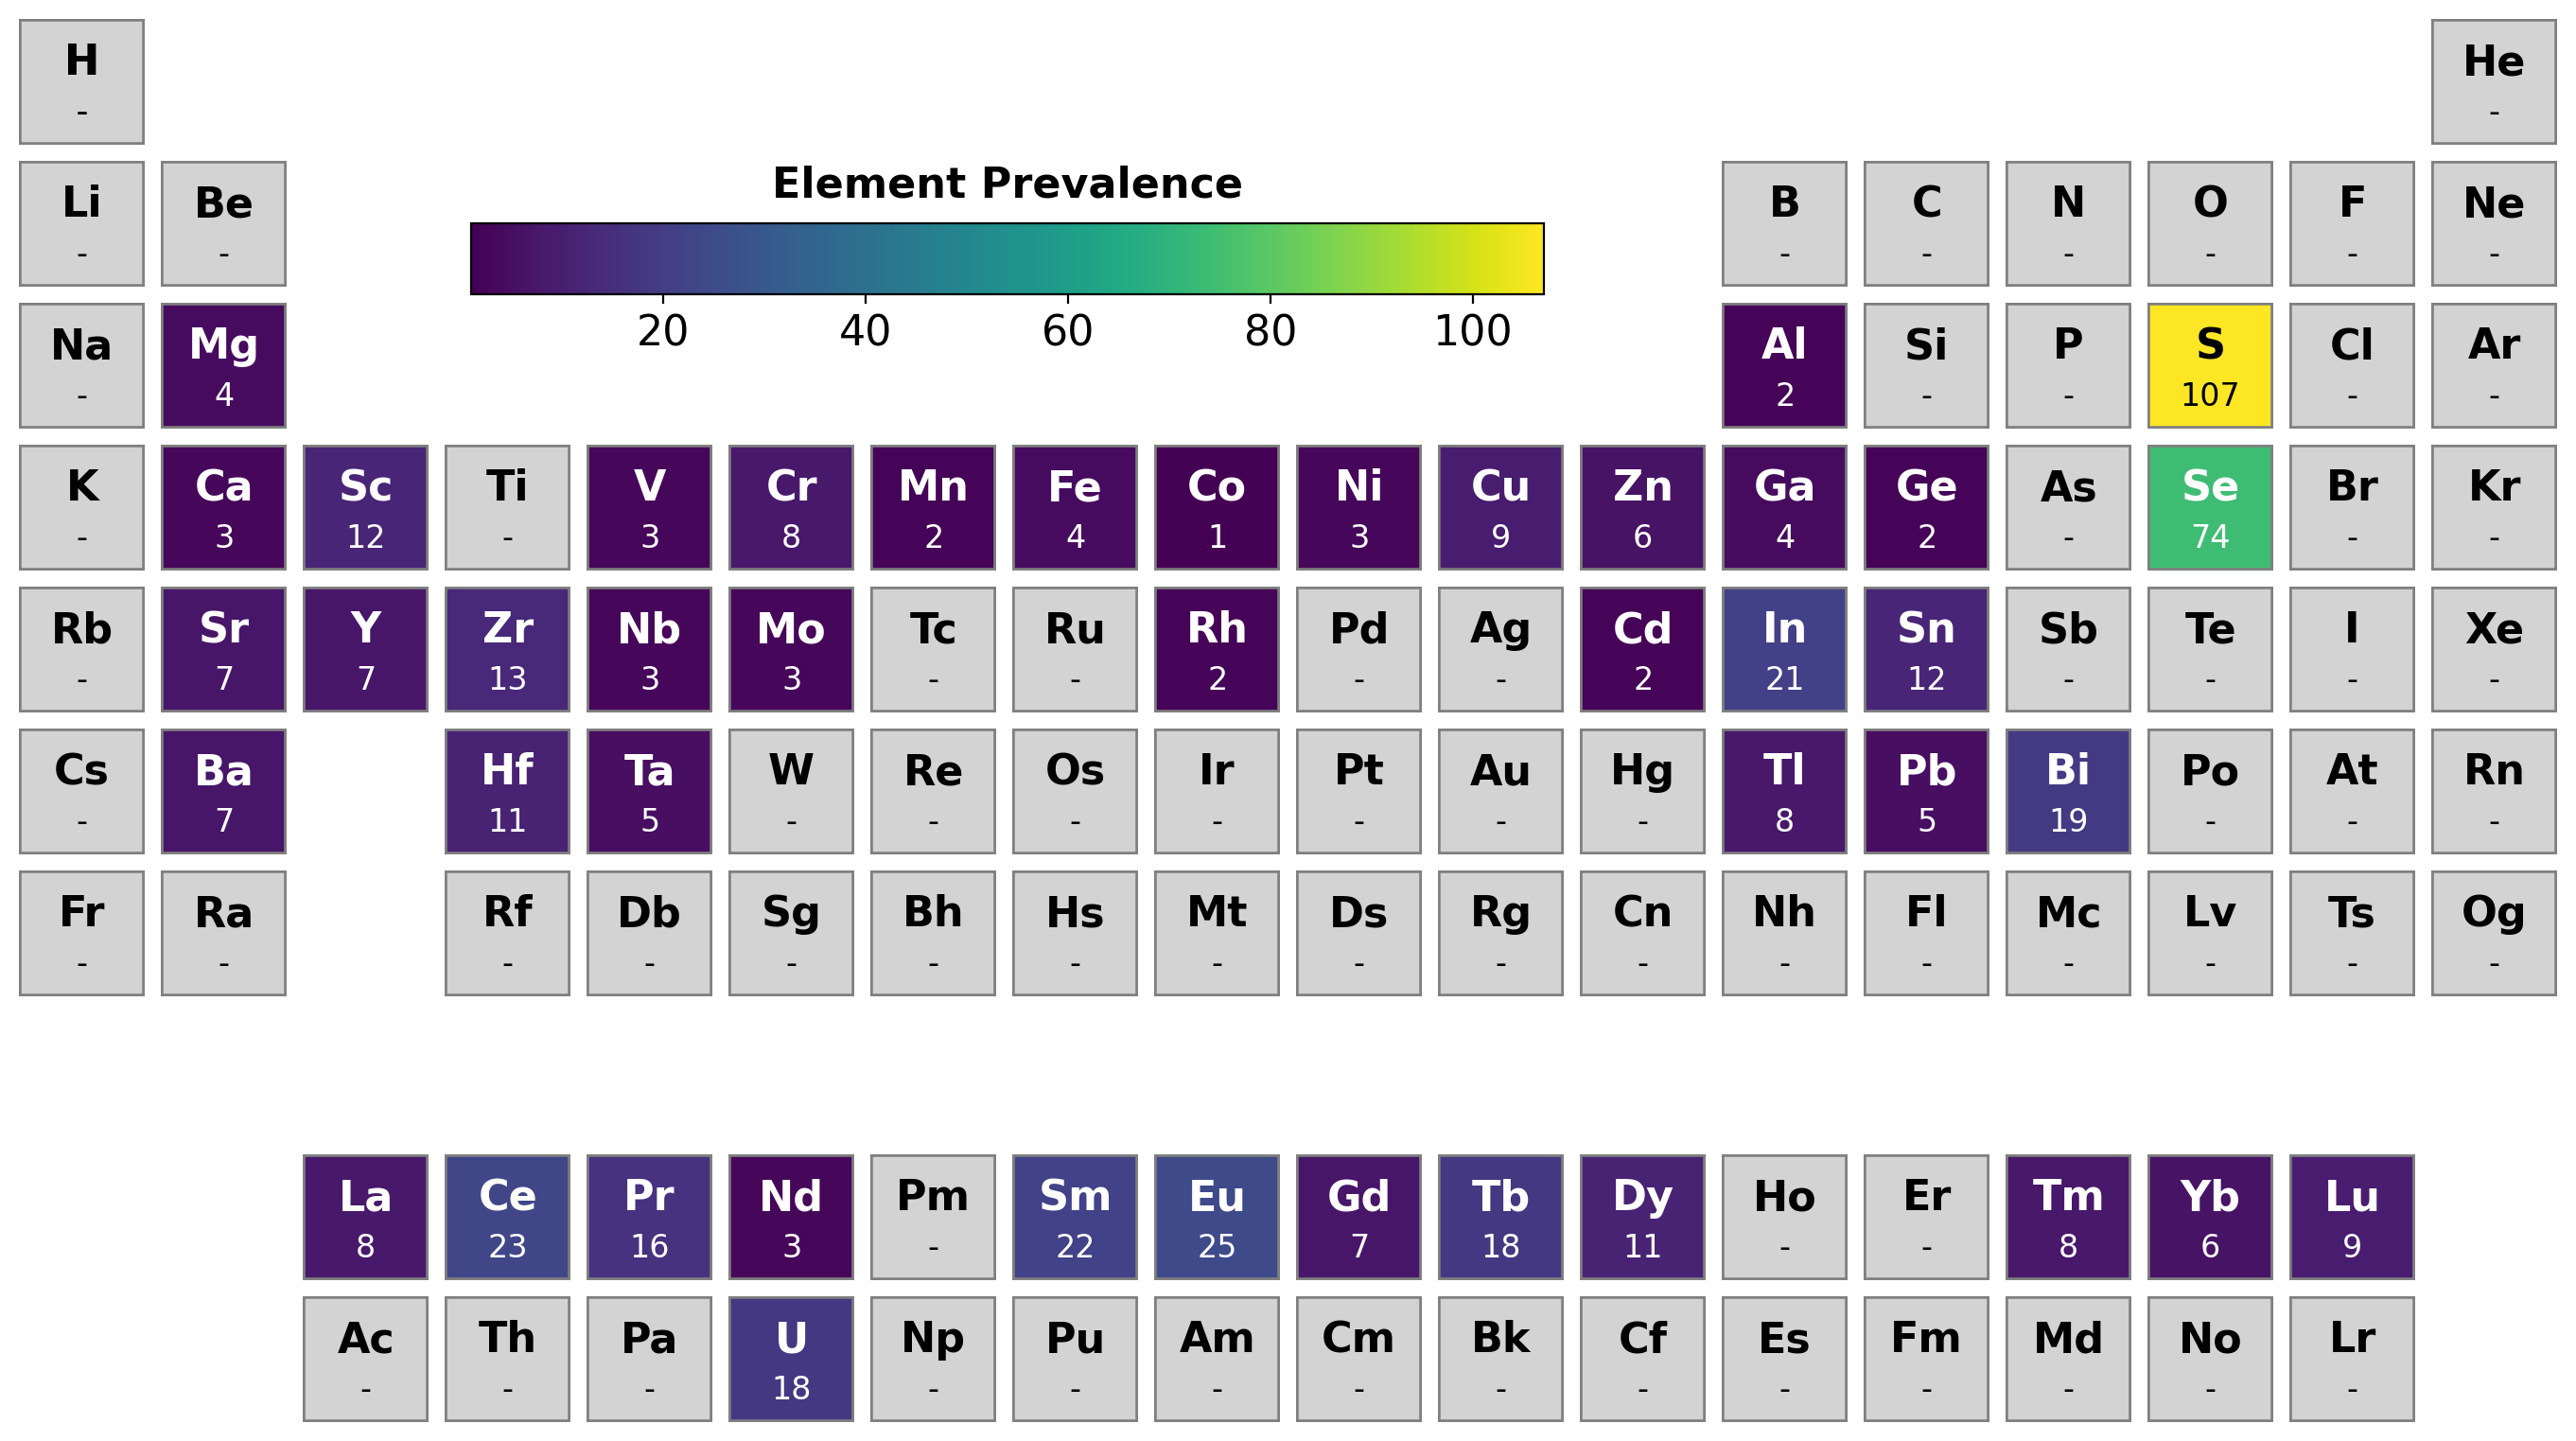

According to t_sisso_82, 131 (9.383954154727794%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaPrS3', 'BaCeS3', 'BaHfS3', 'BaZrS3', 'BaUS3', 'BaUSe3', 'EuSnS3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuGdS3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuErS3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuTlS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbSnS3', 'PbCeS3', 'SrSnS3', 'SrPrS3', 'SrCeS3', 'SrHfS3', 'SrZrS3', 'SrUS3', 'SrUSe3', 'CaSnS3', 'CaCeS3', 'CaHfS3', 'CaZrS3', 'CaUS3', 'CdCeS3', 'CdHfS3', 'CdZrS3', 'CdUS3', 'MgCeS3', 'LaScS3', 'LaTlS3', 'LaTbS3', 'LaInS3', 'PrLuS3', 'PrScS3', 'PrTlS3', 'PrZrS3', 'PrTbS3', 'PrUS3', 'PrInS3', 'CeYbS3', 'SmCeS3', 'SmCeSe3', 'CeYS3', 'CeYSe3', 'CeTmS3', 'CeTmSe3', 'CeLuS3', 'CeLuSe3', 'CeScS3', 'BiCeS3', 'BiCeSe3', 'CeUS3', 'CeUSe3', 'CeInS3', 'SmYbS3', 'SmYbSe3', 'BiYbS3', 'BiYbSe3', 'GdScS3', 'GdTlS3', 'GdTbS3', 'GdInS3', 'SmYS3',

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


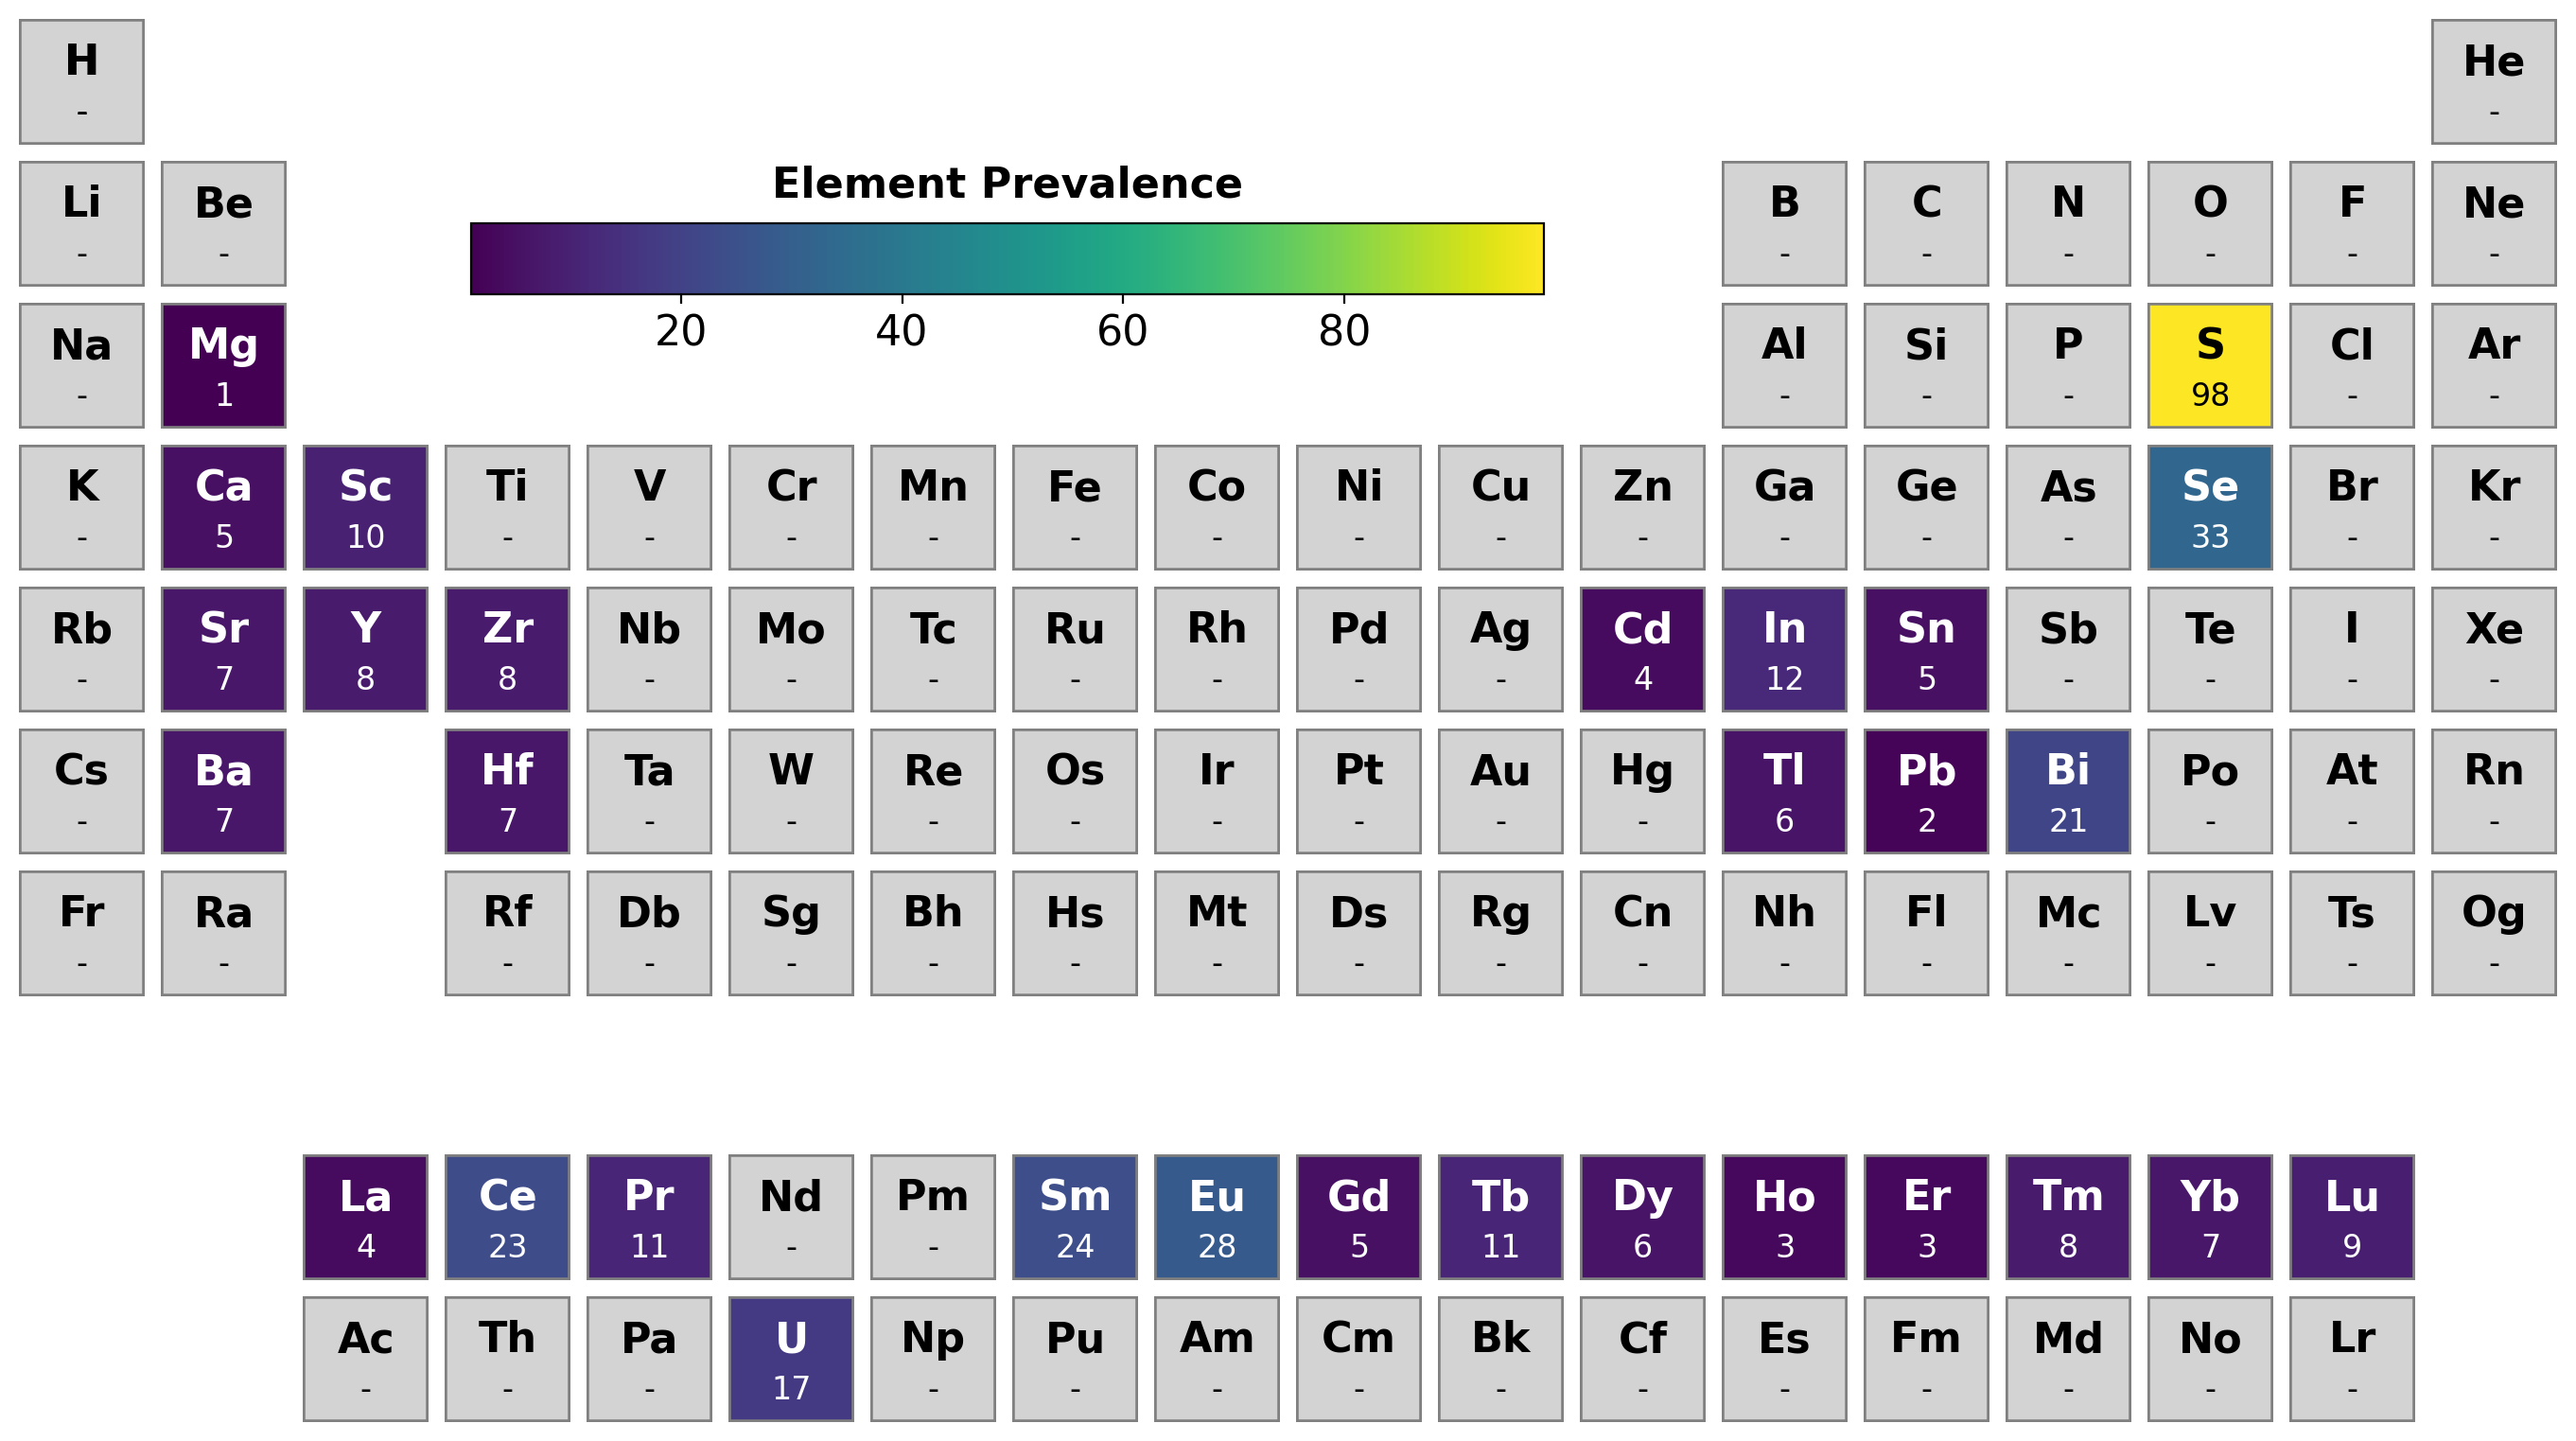

According to t_sisso_11, 1234 (88.39541547277938%) compositions are predicted to be stable as perovskites:
['BaPbS3', 'BaPbSe3', 'BaSnSe3', 'BaGeS3', 'BaGeSe3', 'BaPrSe3', 'BaCeSe3', 'BaSiS3', 'BaSiSe3', 'BaVS3', 'BaVSe3', 'BaRhS3', 'BaRhSe3', 'BaTiS3', 'BaTiSe3', 'BaRuS3', 'BaRuSe3', 'BaMoS3', 'BaMoSe3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfSe3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaPtS3', 'BaPtSe3', 'BaPdS3', 'BaPdSe3', 'BaNiS3', 'BaNiSe3', 'BaCoS3', 'BaCoSe3', 'BaCrS3', 'BaCrSe3', 'BaMnS3', 'BaMnSe3', 'EuPbS3', 'EuPbSe3', 'EuSnSe3', 'EuCuS3', 'EuCuSe3', 'EuGeS3', 'EuGeSe3', 'EuLaS3', 'EuLaSe3', 'EuNdS3', 'EuNdSe3', 'EuGdS3', 'EuGdSe3', 'EuSmS3', 'EuSmSe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuScSe3', 'EuBiS3', 'EuBiSe3', 'EuSiS3', 'EuSiSe3', 'EuVS3', 'EuVSe3', 'EuRhS3', 'EuRhSe3', 'EuTiS3', 'EuTiSe3', 'EuRuS3', 'EuRuSe3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuTaSe3', 'EuNbS3', 'EuNbSe3', 'EuHfSe3', 'EuZrSe3', 'EuPtS3', 'EuPtSe3', 'EuPdS3', 'EuPdSe3', 'EuNiS3', 'EuNiSe3',

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


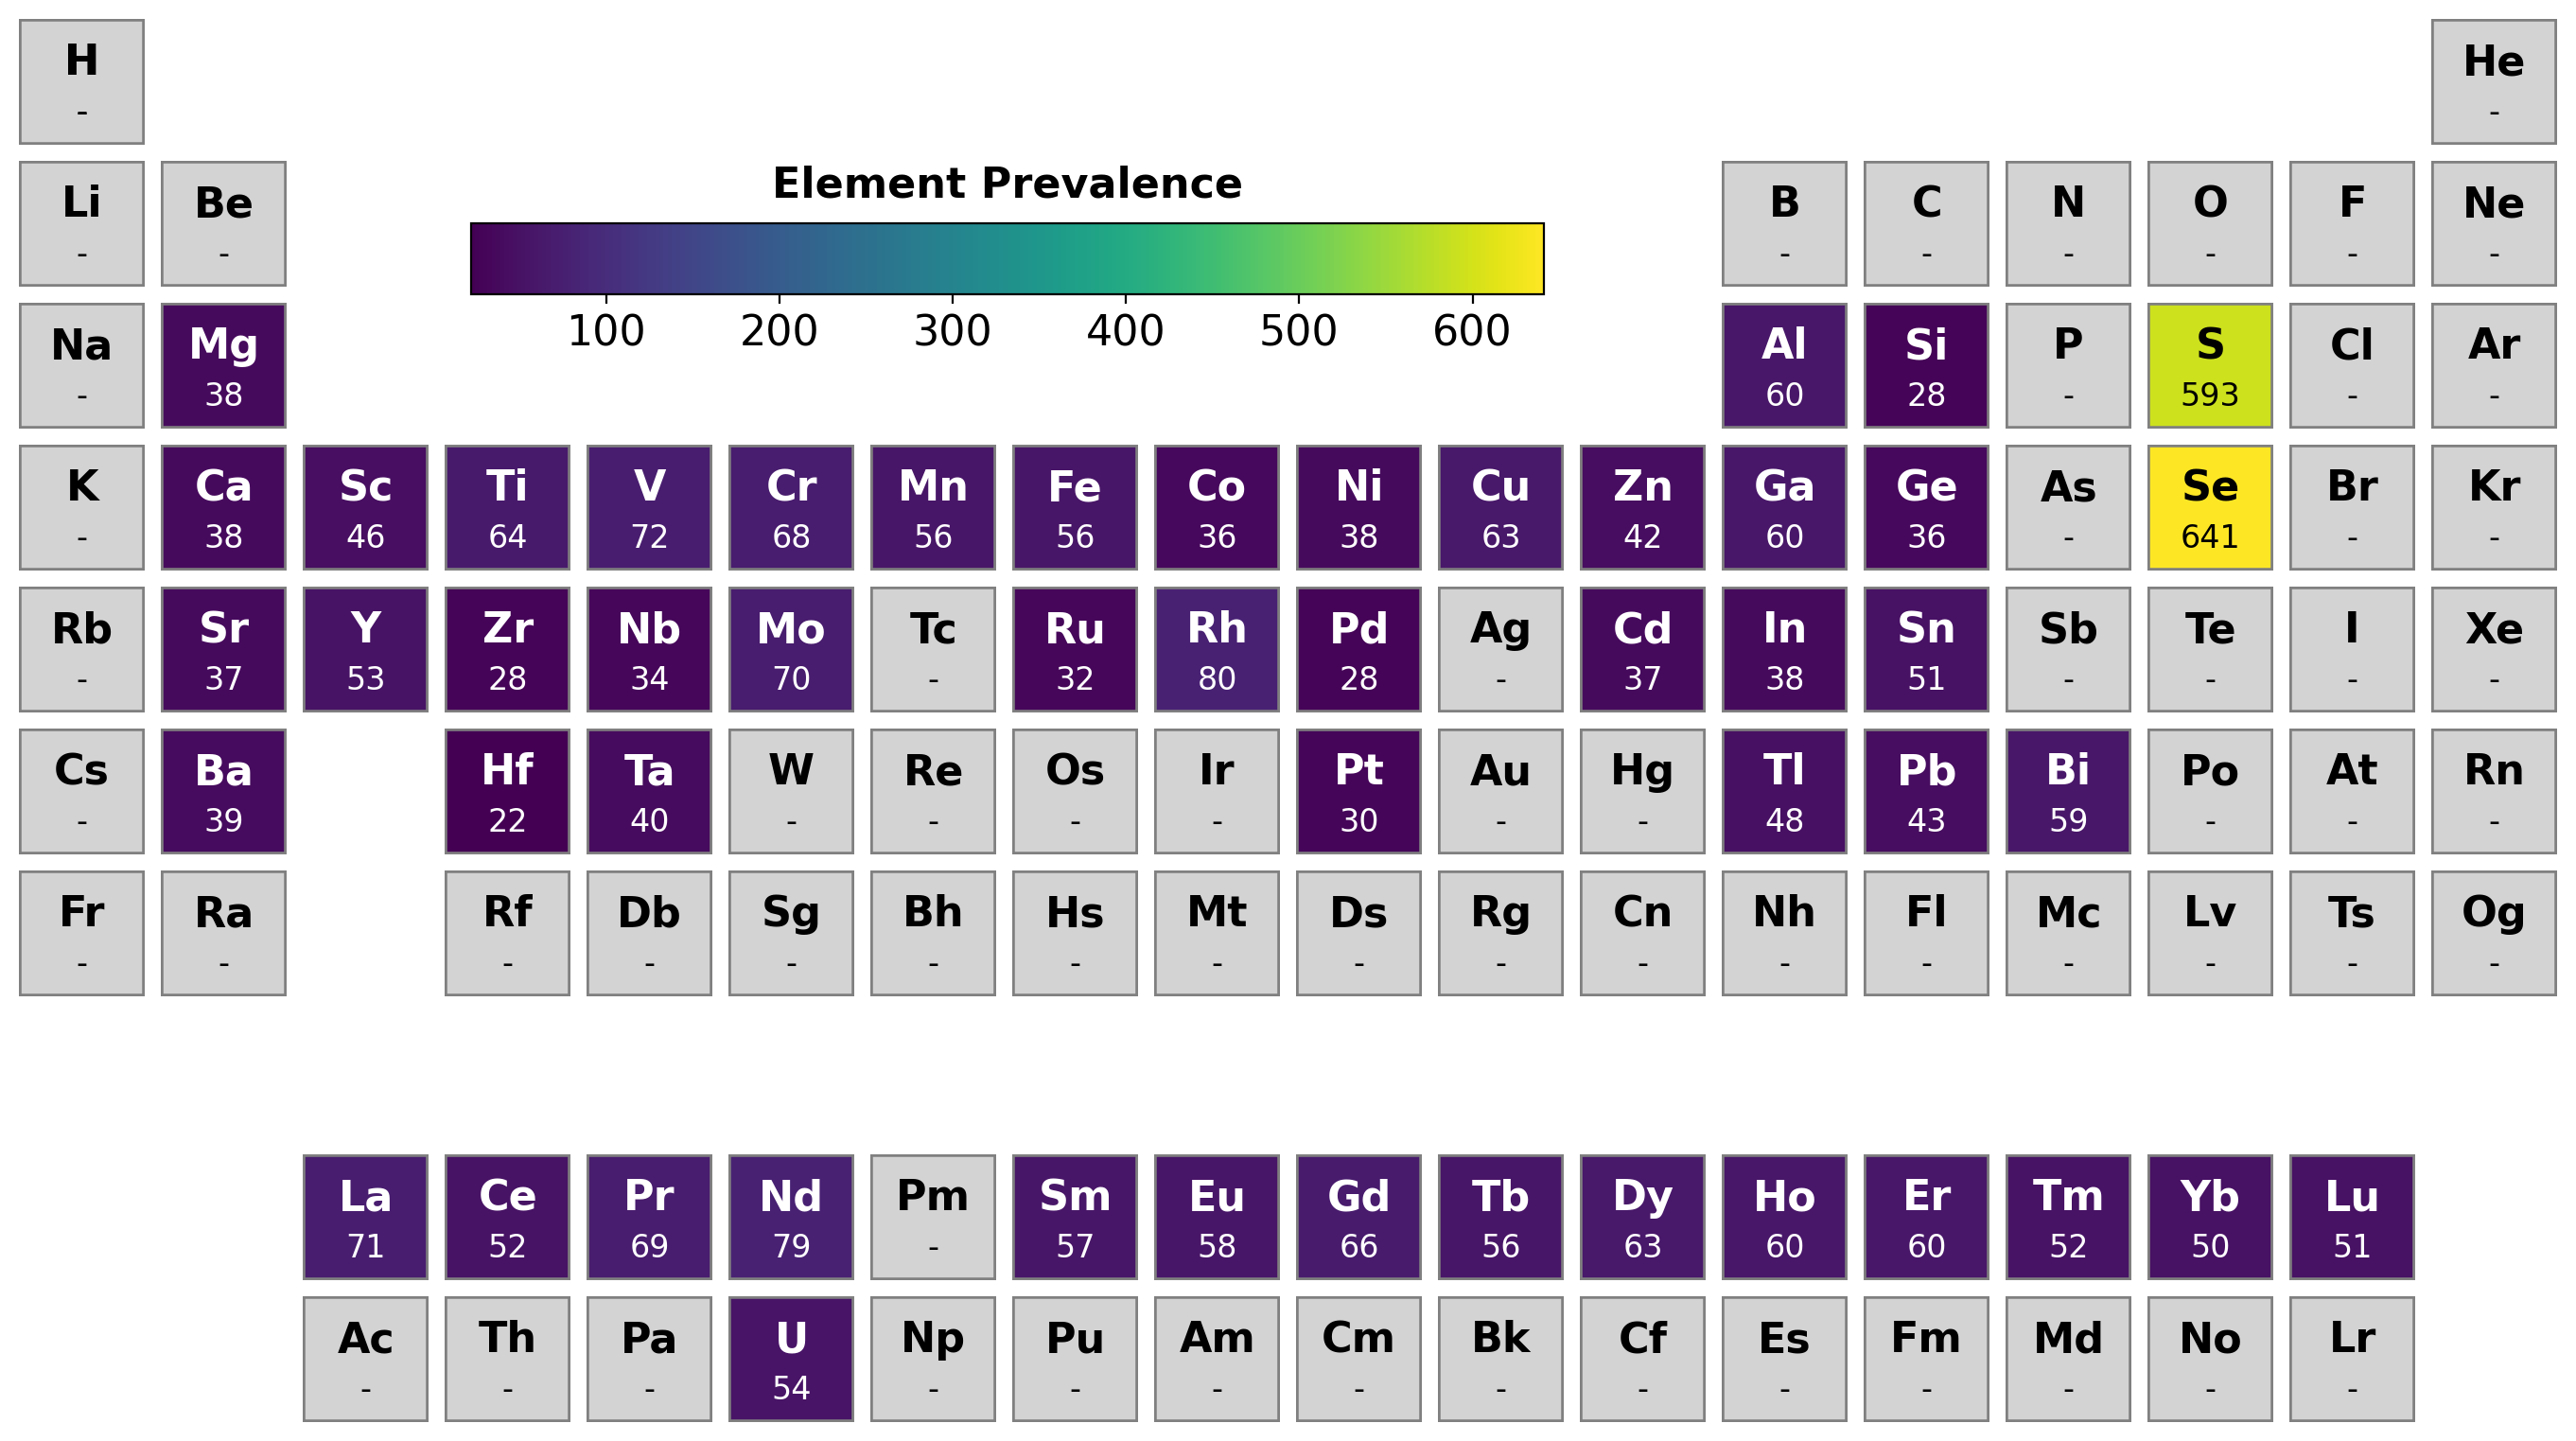

According to t_sisso_12, 152 (10.888252148997136%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaPrS3', 'BaCeS3', 'BaHfS3', 'BaZrS3', 'BaUS3', 'BaUSe3', 'EuSnS3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuGdS3', 'EuGdSe3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuTlS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbSnS3', 'PbCeS3', 'SrSnS3', 'SrPrS3', 'SrCeS3', 'SrHfS3', 'SrZrS3', 'SrUS3', 'SrUSe3', 'CaSnS3', 'CaPrS3', 'CaCeS3', 'CaHfS3', 'CaZrS3', 'CaUS3', 'CaUSe3', 'CdPrS3', 'CdCeS3', 'CdHfS3', 'CdZrS3', 'CdUS3', 'CdUSe3', 'MgCeS3', 'LaScS3', 'LaTlS3', 'LaTbS3', 'LaTbSe3', 'LaInS3', 'PrTmS3', 'PrLuS3', 'PrLuSe3', 'PrScS3', 'PrTlS3', 'PrZrS3', 'PrTbS3', 'PrTbSe3', 'PrUS3', 'PrUSe3', 'PrInS3', 'PrInSe3', 'CeYbS3', 'CeYbSe3', 'SmCeS3', 'SmCeSe3', 'CeYS3', 'CeYSe3', 'CeTmS3', 'CeTmSe3', 'CeLuS3', 'CeLuSe3', '

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


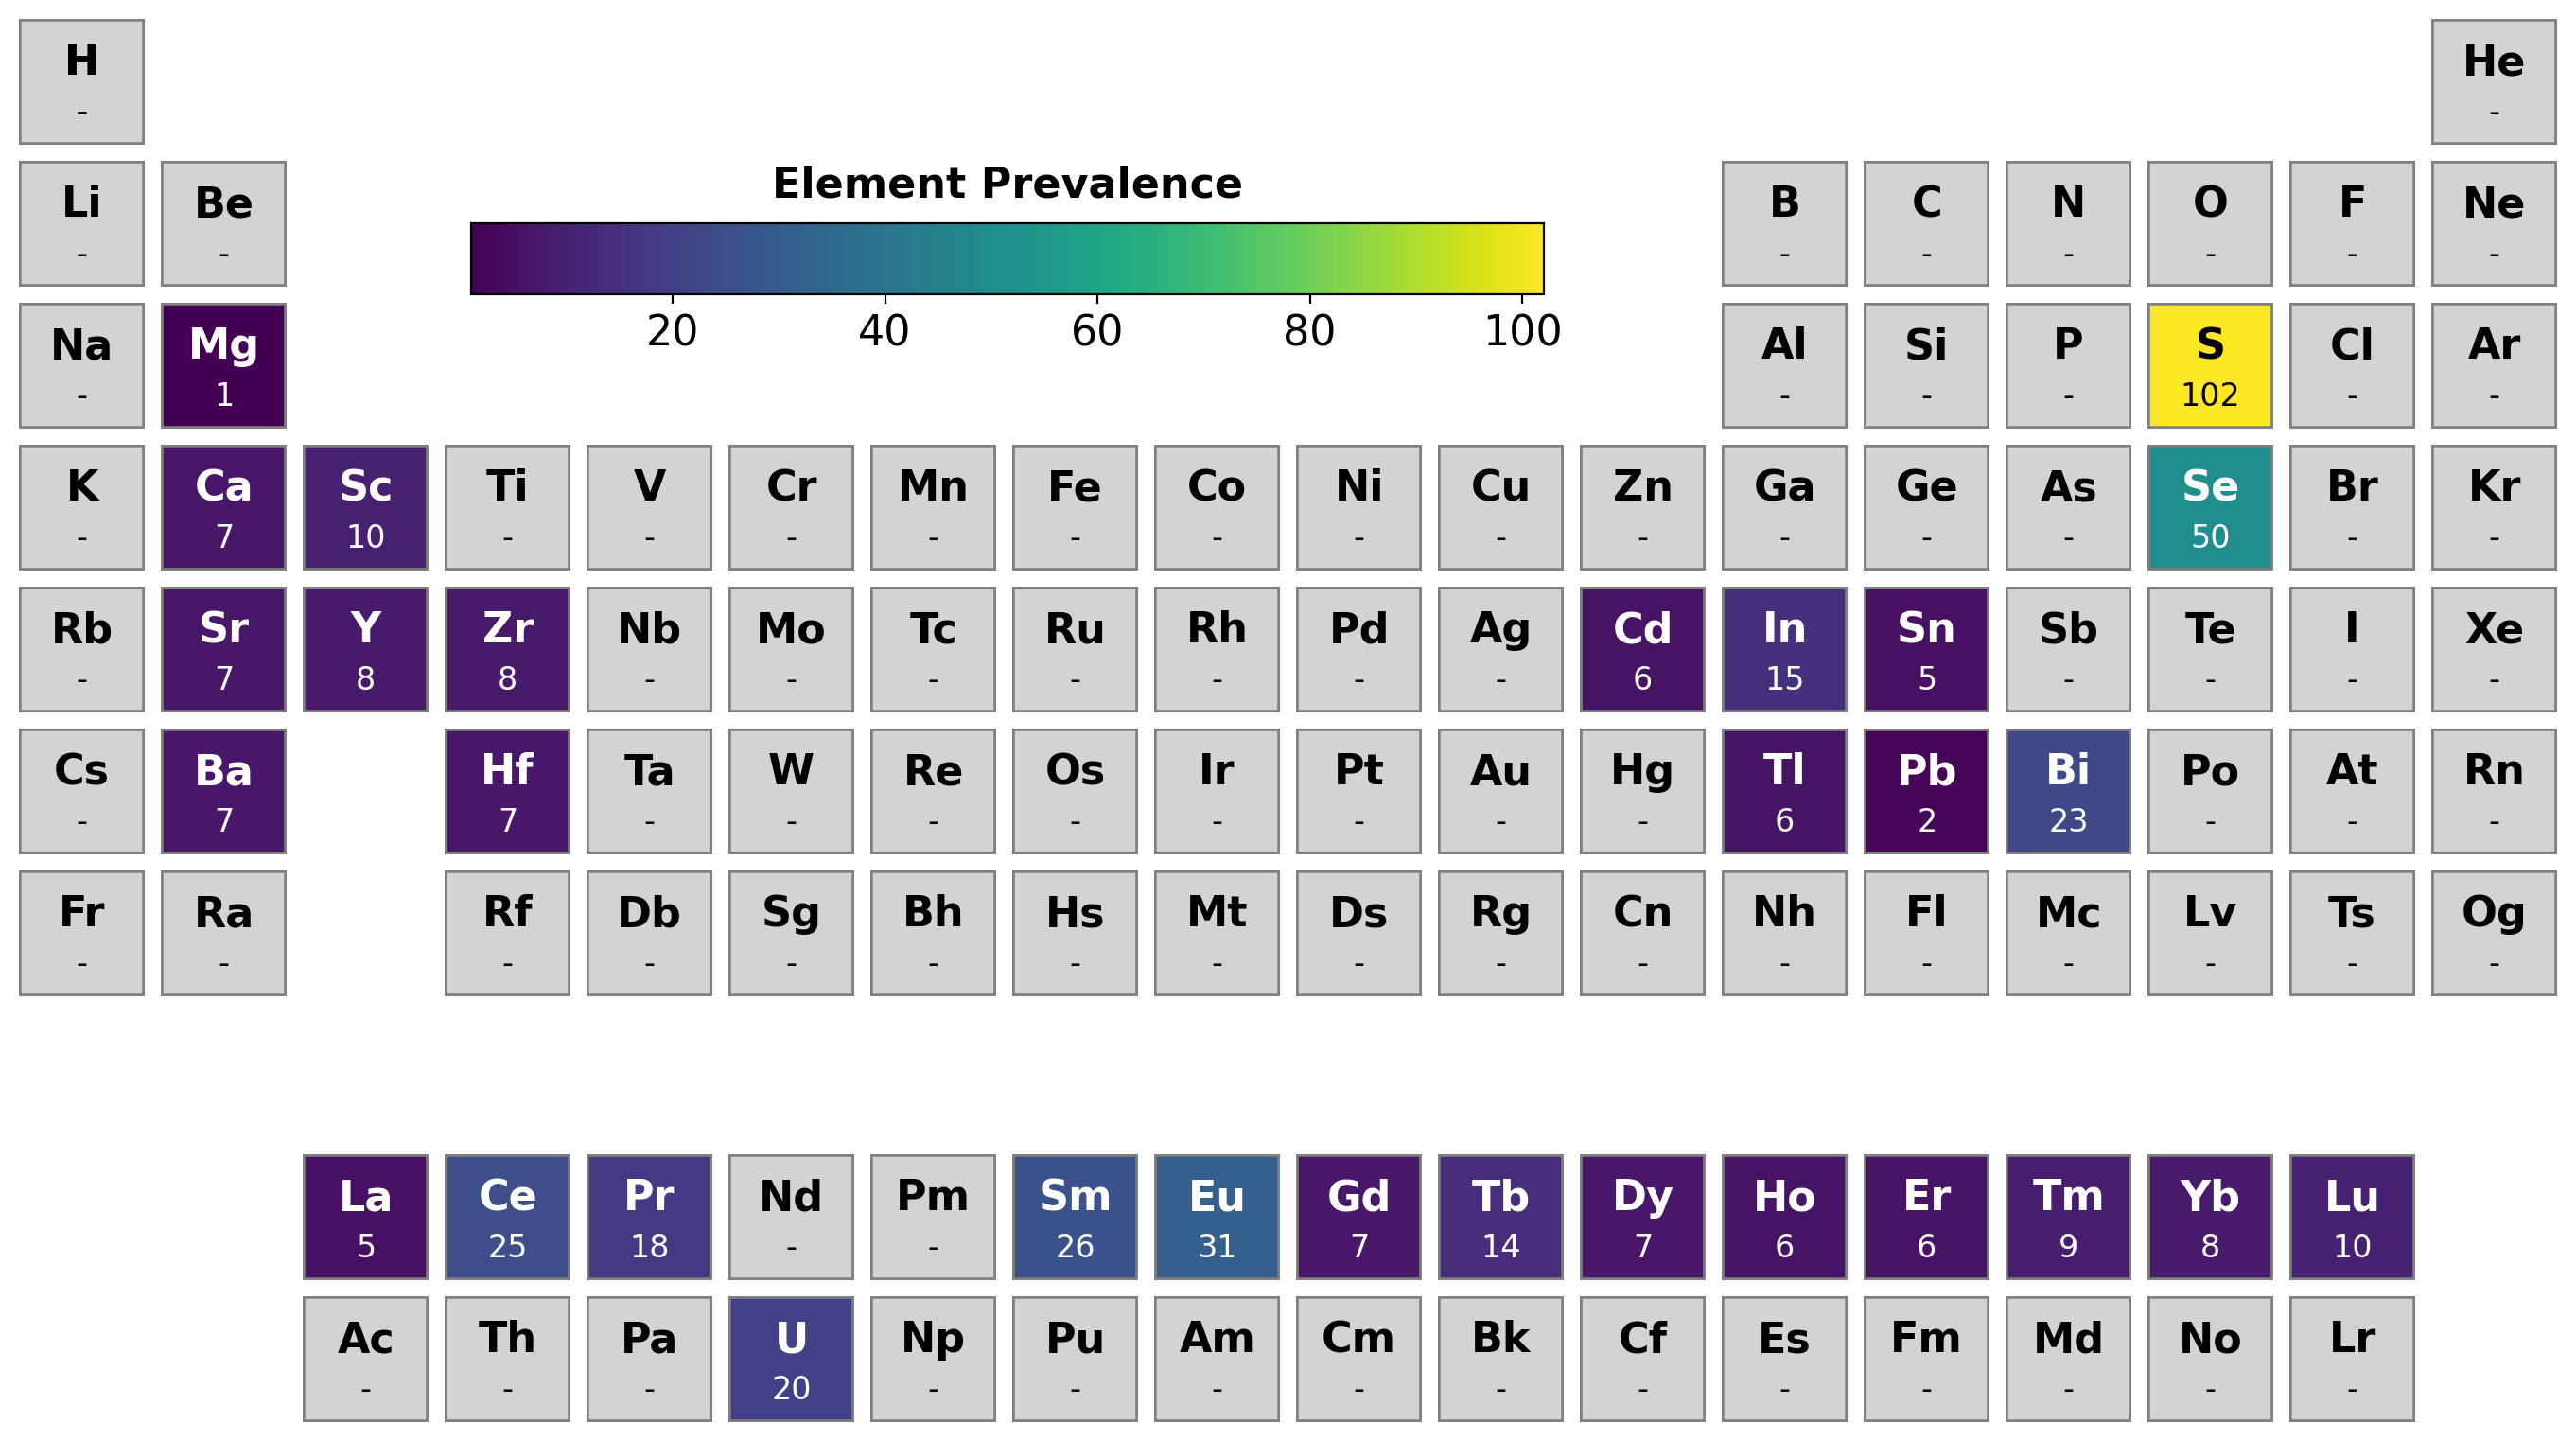

According to t_sisso_88, 1108 (79.36962750716332%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaSnSe3', 'BaGeS3', 'BaGeSe3', 'BaVS3', 'BaVSe3', 'BaTiS3', 'BaTiSe3', 'BaMoS3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfS3', 'BaHfSe3', 'BaZrS3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaNiS3', 'BaNiSe3', 'BaCoS3', 'BaCoSe3', 'BaCrS3', 'BaCrSe3', 'BaMnS3', 'BaMnSe3', 'EuSnS3', 'EuSnSe3', 'EuCuS3', 'EuCuSe3', 'EuGeS3', 'EuGeSe3', 'EuLaS3', 'EuLaSe3', 'EuCeS3', 'EuNdS3', 'EuNdSe3', 'EuYbS3', 'EuGdS3', 'EuGdSe3', 'EuSmS3', 'EuSmSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuScSe3', 'EuTlS3', 'EuTlSe3', 'EuBiS3', 'EuBiSe3', 'EuVS3', 'EuVSe3', 'EuTiS3', 'EuTiSe3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuTaSe3', 'EuNbS3', 'EuNbSe3', 'EuHfSe3', 'EuZrSe3', 'EuNiS3', 'EuNiSe3', 'EuCoS3', 'EuCoSe3', 'EuGaS3', 'EuGaSe3', 'EuAlS3', 'EuAlSe3', 'EuFeS3', 'EuFeSe3', 'EuCrS3', 'EuCrSe3', 'EuInS3', 'EuInSe3', 'EuMnS3', 'EuMnSe3', 'PbSnS3', 'PbSnSe3', 'PbGeS3', 'PbG

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


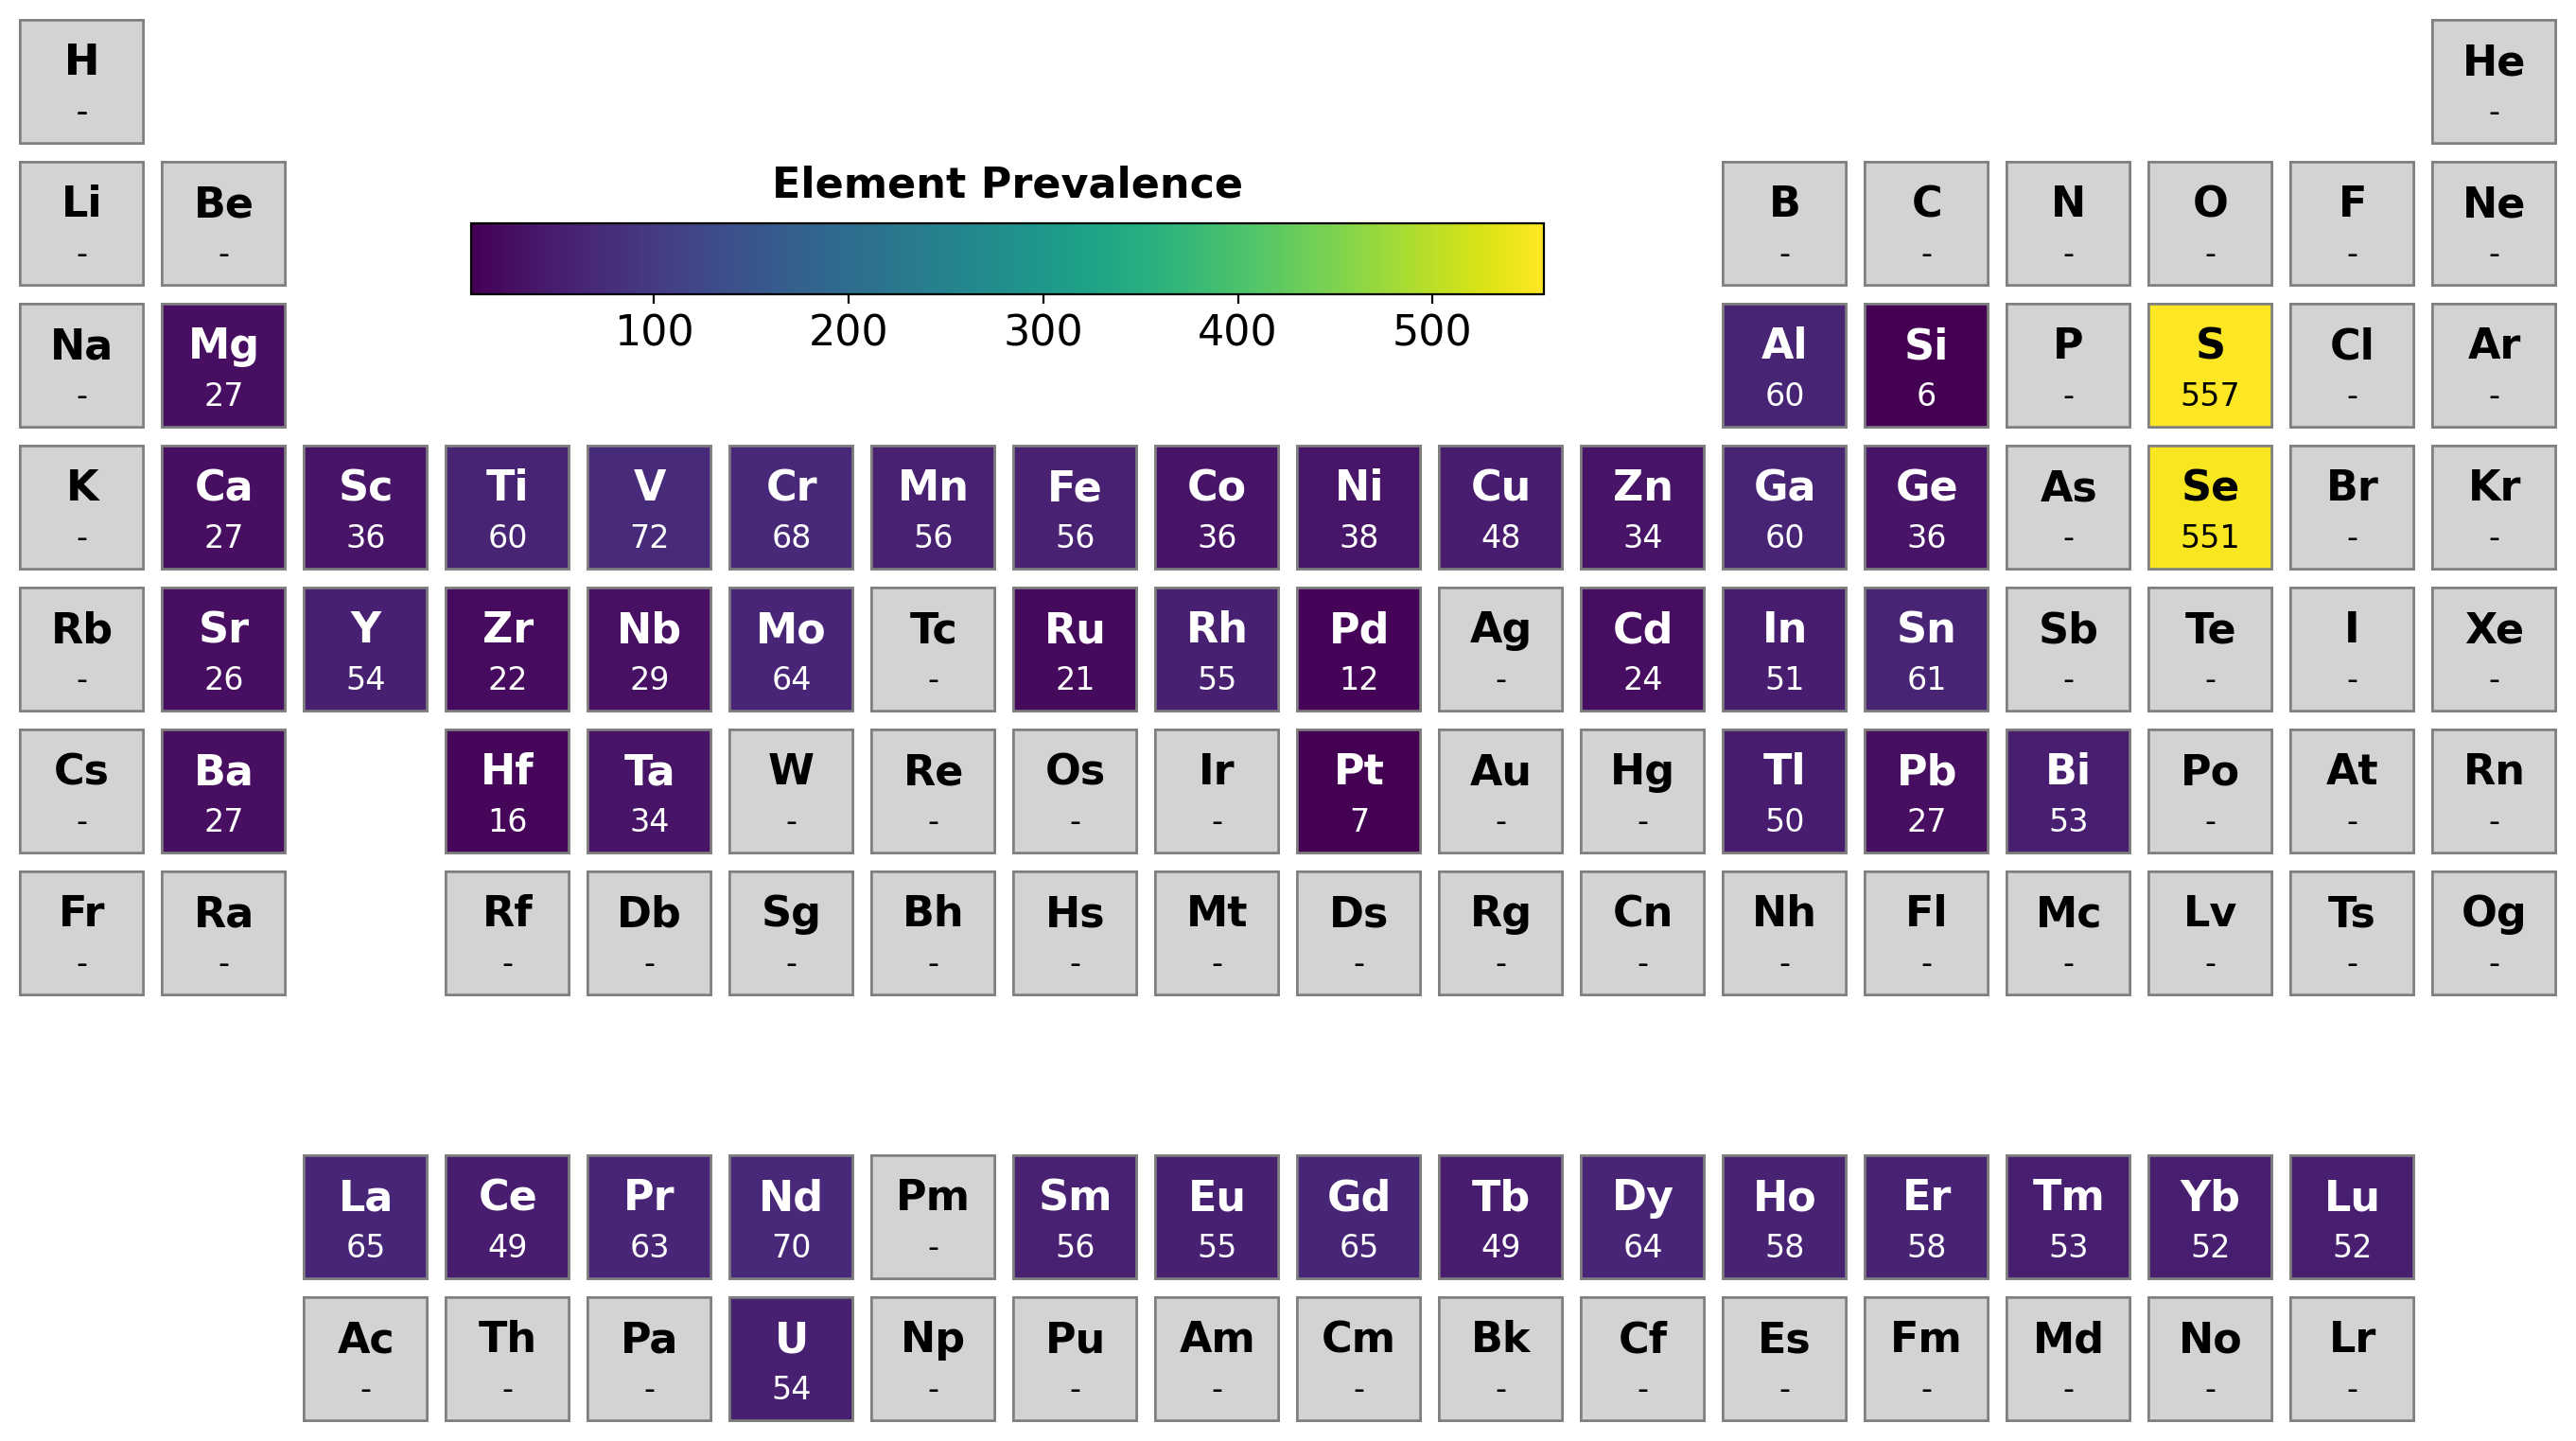

According to t_sisso_17, 1080 (77.36389684813754%) compositions are predicted to be stable as perovskites:
['BaPbS3', 'BaSnS3', 'BaSnSe3', 'BaGeS3', 'BaGeSe3', 'BaPrS3', 'BaPrSe3', 'BaCeS3', 'BaCeSe3', 'BaSiS3', 'BaSiSe3', 'BaVS3', 'BaVSe3', 'BaRhS3', 'BaRhSe3', 'BaTiS3', 'BaTiSe3', 'BaRuS3', 'BaRuSe3', 'BaMoS3', 'BaMoSe3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfS3', 'BaHfSe3', 'BaZrS3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaPtS3', 'BaPtSe3', 'BaPdS3', 'BaPdSe3', 'BaNiS3', 'BaNiSe3', 'BaCoS3', 'BaCoSe3', 'BaCrS3', 'BaCrSe3', 'BaMnS3', 'BaMnSe3', 'EuCuS3', 'EuCuSe3', 'EuGeS3', 'EuGeSe3', 'EuLaS3', 'EuLaSe3', 'EuNdS3', 'EuNdSe3', 'EuSmS3', 'EuSmSe3', 'EuSiS3', 'EuSiSe3', 'EuVS3', 'EuVSe3', 'EuRhS3', 'EuRhSe3', 'EuTiS3', 'EuTiSe3', 'EuRuS3', 'EuRuSe3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuTaSe3', 'EuNbS3', 'EuNbSe3', 'EuHfS3', 'EuHfSe3', 'EuZrS3', 'EuZrSe3', 'EuPtS3', 'EuPtSe3', 'EuPdS3', 'EuPdSe3', 'EuNiS3', 'EuNiSe3', 'EuCoS3', 'EuCoSe3', 'EuGaS3', 'EuGaSe3', 'EuAlS3', 'EuAlSe3', 'EuF

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


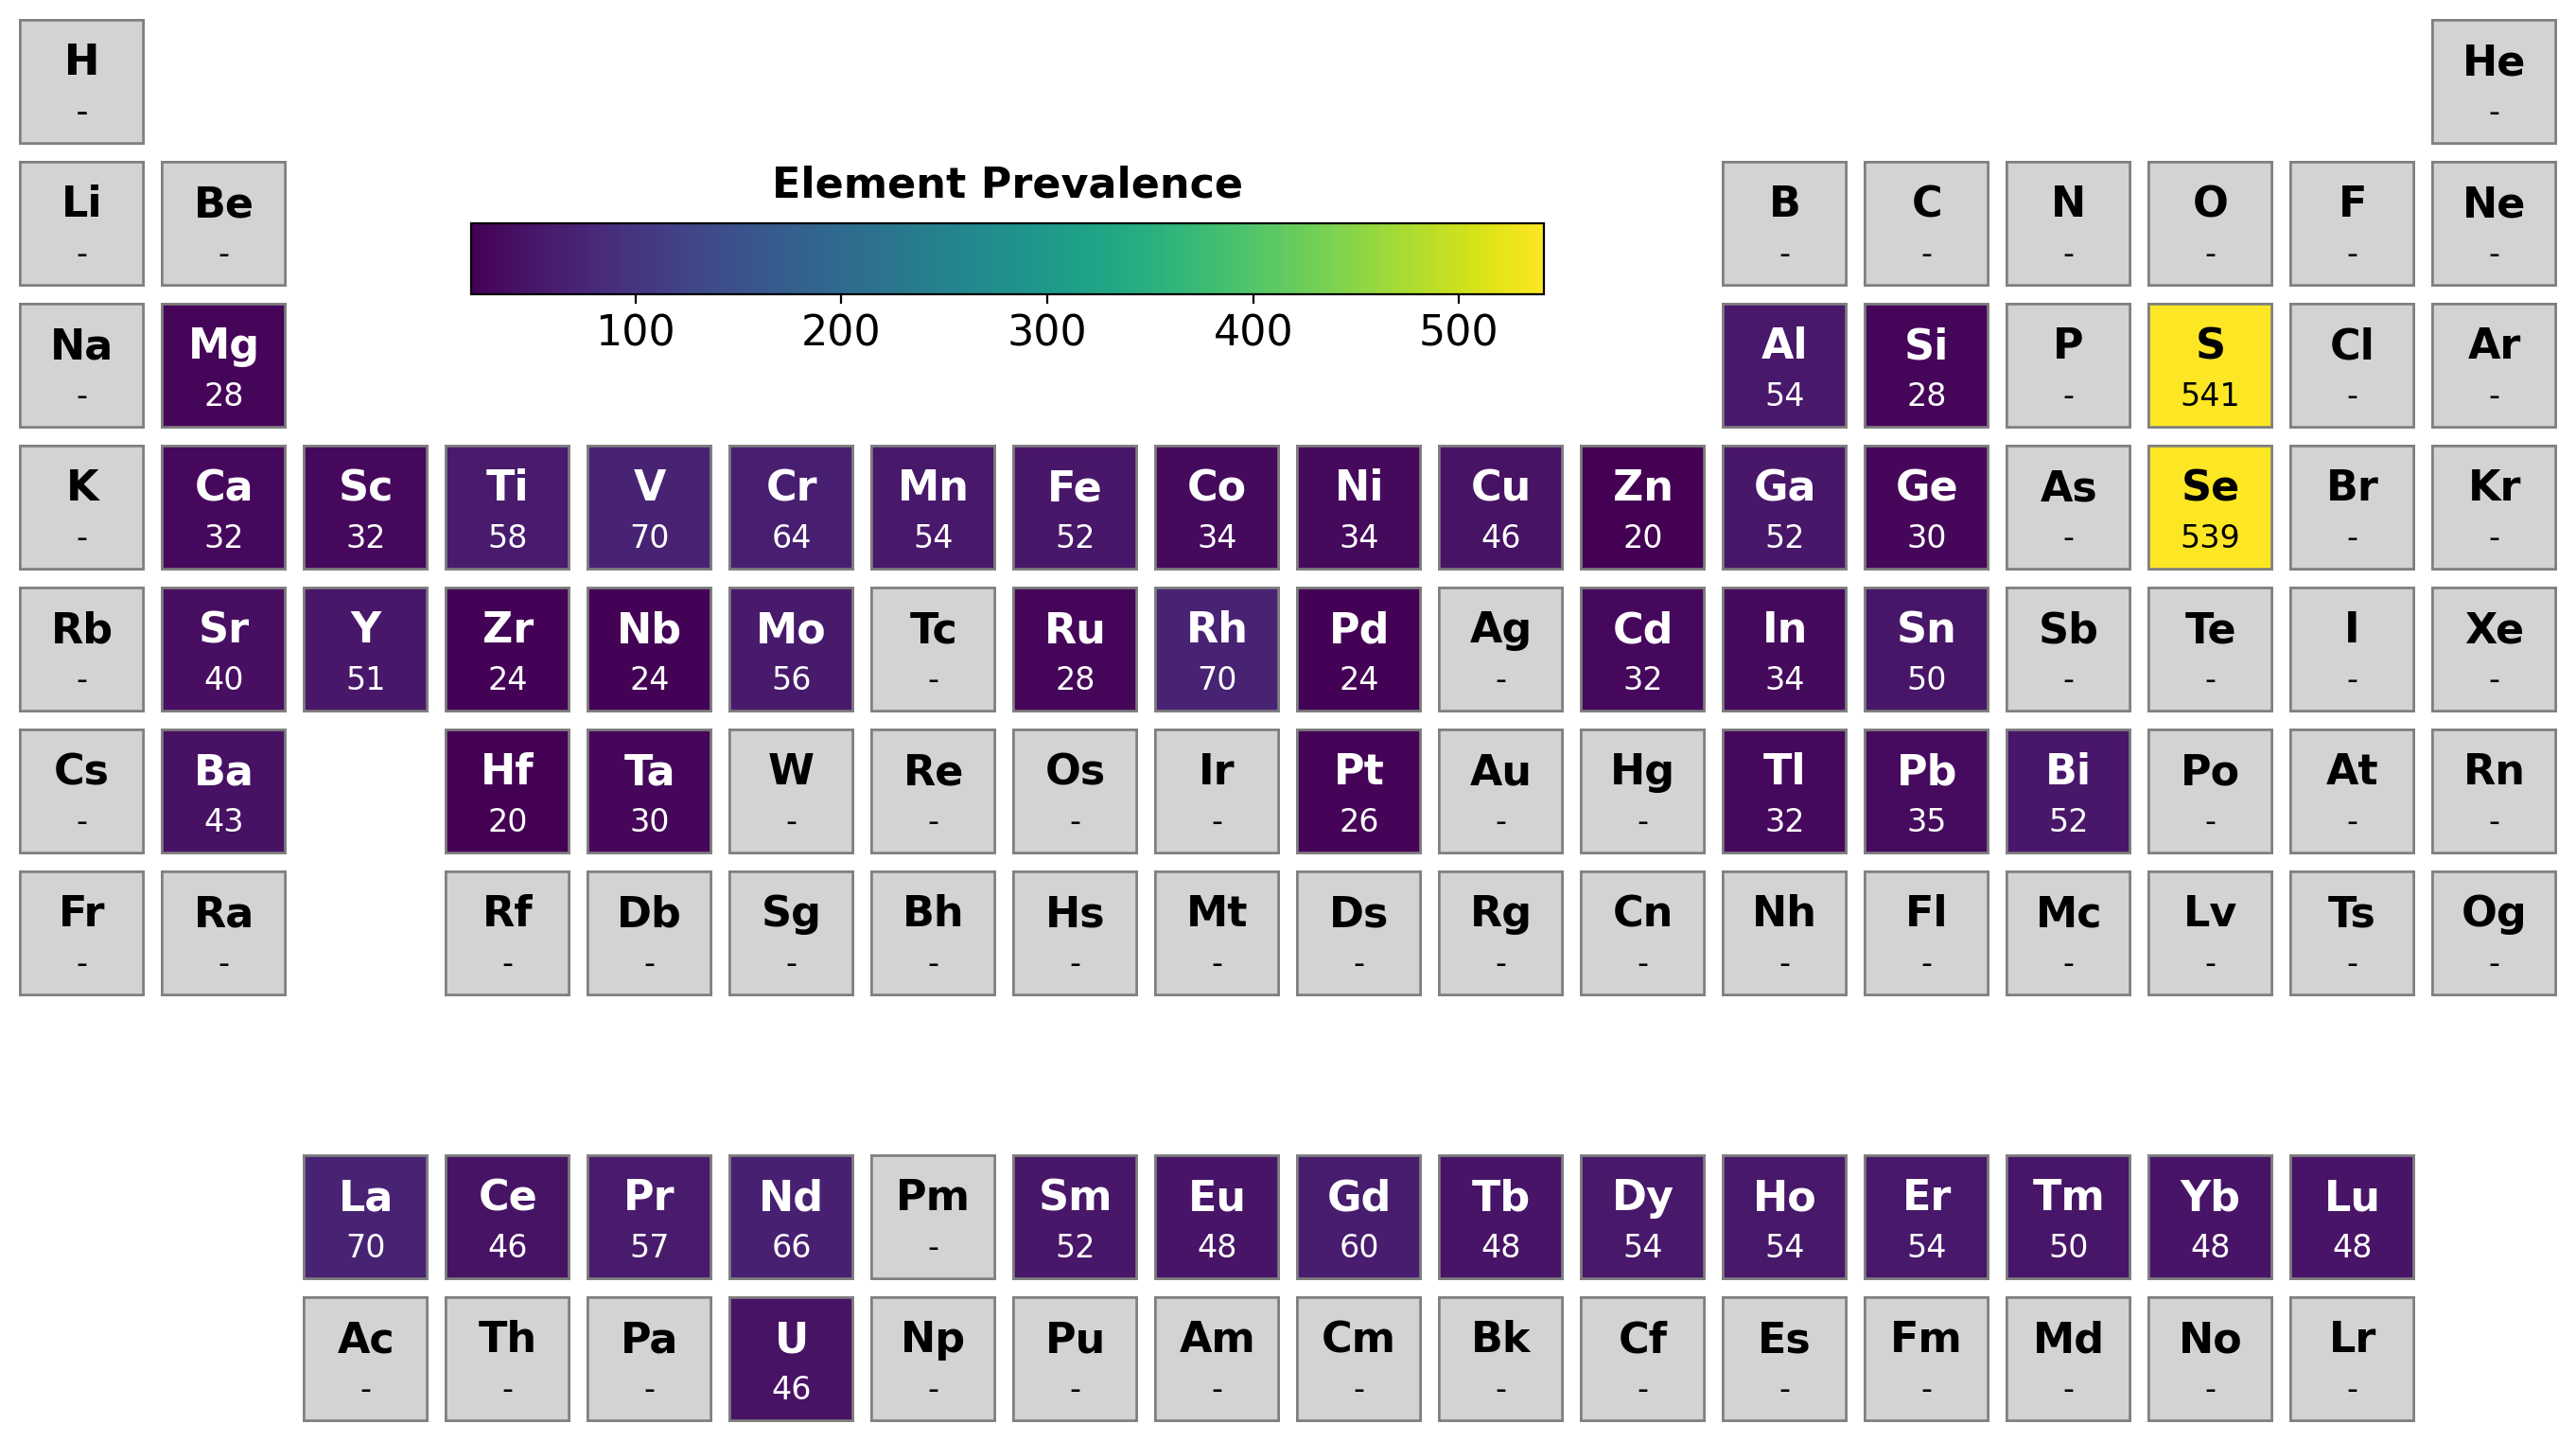

In [ ]:
from tf_chpvk_pv.plots import graph_periodic_table

for t in tolerance_factor_dict_global.keys():
    if t not in ['t', 't_jess']:
        stable_candidates_t_sisso, df_out = check_stable_compositions(t, tolerance_factor_dict_path=new_tolerance_dict_path)
        graph_periodic_table(stable_candidates_t_sisso, t=t)

In [ ]:
import re

d1 = train_df[train_df.exp_label == 1]
d2 = test_df[test_df.exp_label == 1]
exp_materials = pd.concat([d1, d2], axis=0)

sulfur_cations = exp_materials[exp_materials.rX == 184.4].index.to_list()
selenium_cations = exp_materials[exp_materials.rX == 198.14].index.to_list()

ch_stable_formulas = sulfur_cations + selenium_cations

# Regex pattern to match chemical symbols
pattern = r'[A-Z][a-z]?'

# Extract elements from each formula
extracted_elements = [re.findall(pattern, formula) for formula in ch_stable_formulas]

/tmp/ipykernel_917053/1458548113.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.sort_values(by=['Z_A', 'Z_B'], inplace=True, ascending=True)
/home/nomad-lanasc/.pyenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1400 with 0 Axes>

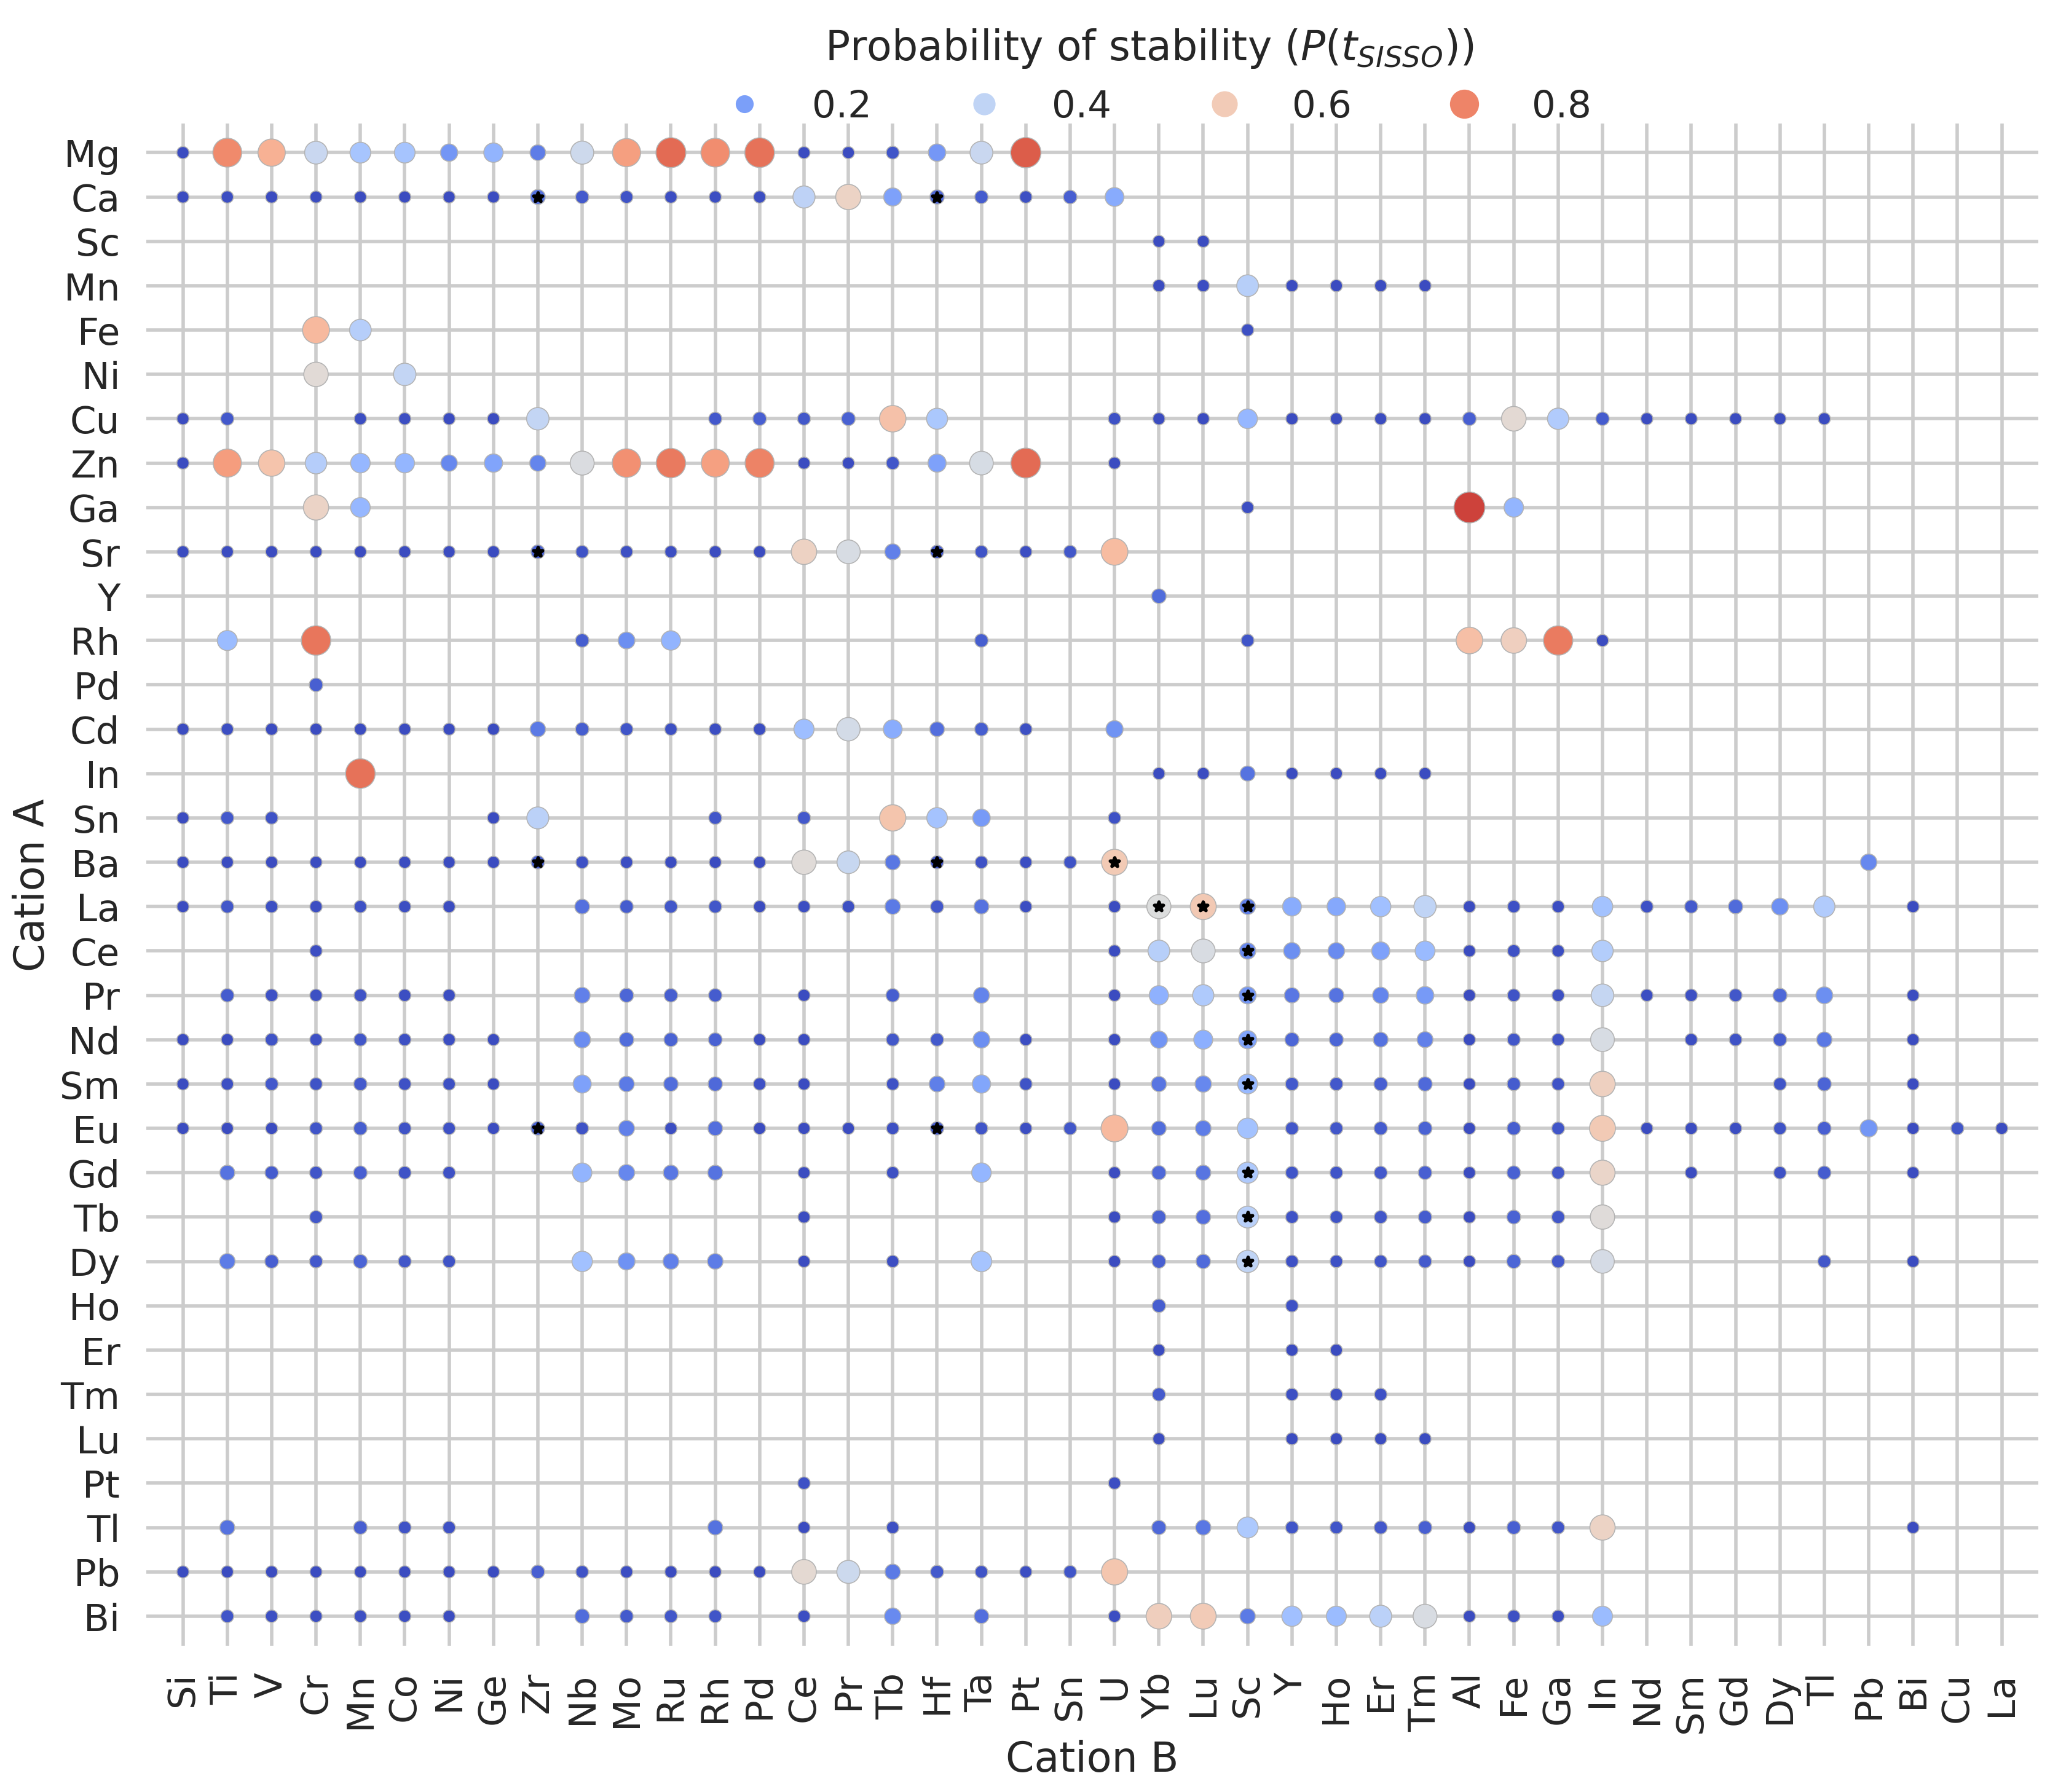

In [ ]:
from tf_chpvk_pv.config import INTERIM_DATA_DIR

def plot_matrix(df_out, idx=None, anion='S', highlight_points=None,
                clf2_platt_path=INTERIM_DATA_DIR / 'Ch_clf2_platt.pkl',):


    import matplotlib.pyplot as plt
    from tf_chpvk_pv.config import FIGURES_DIR
    import pickle
    import numpy as np
    import seaborn as sns

    clf2_platt = pickle.load(open(clf2_platt_path, 'rb'))

    #check formulas
    new_extracted_elements = []
    hp = highlight_points.copy()
    for x in hp:
        if anion in x:
            new_extracted_elements.append(x[:2])

    t = 't_sisso_'

    column_p = 'p_t_sisso_'

    if idx is not None:
        column_p = 'p_t_sisso_' + str(idx)
        t = 't_sisso_' + str(idx)
    else:
        column_p = 'p_t_sisso'
        t = 't_sisso'

    x_t = df_out[t].to_numpy()

    if column_p not in df_out.columns:
        clf2 = clf2_platt[t]
        df_out[column_p] = clf2.predict_proba(x_t.reshape(-1, 1))[:, 1]
    
    element_to_number = {
    "H": 1, "He": 2, "Li": 3, "Be": 4, "B": 5, "C": 6, "N": 7, "O": 8, "F": 9, "Ne": 10,
    "Na": 11, "Mg": 12, "Al": 13, "Si": 14, "P": 15, "S": 16, "Cl": 17, "Ar": 18, "K": 19, "Ca": 20,
    "Sc": 21, "Ti": 22, "V": 23, "Cr": 24, "Mn": 25, "Fe": 26, "Co": 27, "Ni": 28, "Cu": 29, "Zn": 30,
    "Ga": 31, "Ge": 32, "As": 33, "Se": 34, "Br": 35, "Kr": 36, "Rb": 37, "Sr": 38, "Y": 39, "Zr": 40,
    "Nb": 41, "Mo": 42, "Tc": 43, "Ru": 44, "Rh": 45, "Pd": 46, "Ag": 47, "Cd": 48, "In": 49, "Sn": 50,
    "Sb": 51, "Te": 52, "I": 53, "Xe": 54, "Cs": 55, "Ba": 56, "La": 57, "Ce": 58, "Pr": 59, "Nd": 60,
    "Pm": 61, "Sm": 62, "Eu": 63, "Gd": 64, "Tb": 65, "Dy": 66, "Ho": 67, "Er": 68, "Tm": 69, "Yb": 70,
    "Lu": 71, "Hf": 72, "Ta": 73, "W": 74, "Re": 75, "Os": 76, "Ir": 77, "Pt": 78, "Au": 79, "Hg": 80,
    "Tl": 81, "Pb": 82, "Bi": 83, "Po": 84, "At": 85, "Rn": 86, "Fr": 87, "Ra": 88, "Ac": 89, "Th": 90,
    "Pa": 91, "U": 92, "Np": 93, "Pu": 94, "Am": 95, "Cm": 96, "Bk": 97, "Cf": 98, "Es": 99, "Fm": 100,
    "Md": 101, "No": 102, "Lr": 103, "Rf": 104, "Db": 105, "Sg": 106, "Bh": 107, "Hs": 108, "Mt": 109,
    "Ds": 110, "Rg": 111, "Cn": 112, "Nh": 113, "Fl": 114, "Mc": 115, "Lv": 116, "Ts": 117, "Og": 118
    }

    df_out['Z_A'] = df_out.A.map(element_to_number)
    df_out['Z_B'] = df_out.B.map(element_to_number)

    df_out = df_out[df_out['X'] == anion]

    df_out.sort_values(by=['Z_A', 'Z_B'], inplace=True, ascending=True)

    sns.set_theme(style="whitegrid")
    sns.set_context('poster')
    plt.figure(figsize=(7, 7))

    ax = sns.relplot(
    data=df_out, x='B', y='A', hue=column_p, size=column_p,
    palette="coolwarm", hue_norm=(0, 1), edgecolor=".7",
    height=14, sizes=(50, 350), size_norm=(0, 1), aspect=1.4
    )

    sns.move_legend(ax, "upper center", title='Probability of stability ($P(t_{SISSO})$)', frameon=False, ncols=4,
                bbox_to_anchor=(0.5, 1.05))

    plt.title('')

    if highlight_points:
        highlight_points = [(str(a), str(b)) for a, b in new_extracted_elements]  # Convert input list to strings
        highlight_df = df_out[df_out[['A', 'B']].apply(tuple, axis=1).isin(highlight_points)]

        if not highlight_df.empty:
            plt.scatter(highlight_df['B'], highlight_df['A'], 
                        color='black', marker='*', s=30, label='Highlighted')

    name_fig = 'matrix_cations_' + t + '_' + anion + '.png'
    # Tweak the figure to finalize
    ax.set(xlabel="Cation B", ylabel="Cation A", aspect="equal")
    plt.xticks(rotation=90)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    ax.despine(left=True, bottom=True)
    ax.ax.margins(.02)
    plt.savefig(FIGURES_DIR / name_fig, dpi=600)


plot_matrix(df_generated_comp, idx=55, anion='S', highlight_points=extracted_elements)

/tmp/ipykernel_917053/1458548113.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.sort_values(by=['Z_A', 'Z_B'], inplace=True, ascending=True)
/home/nomad-lanasc/.pyenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1400 with 0 Axes>

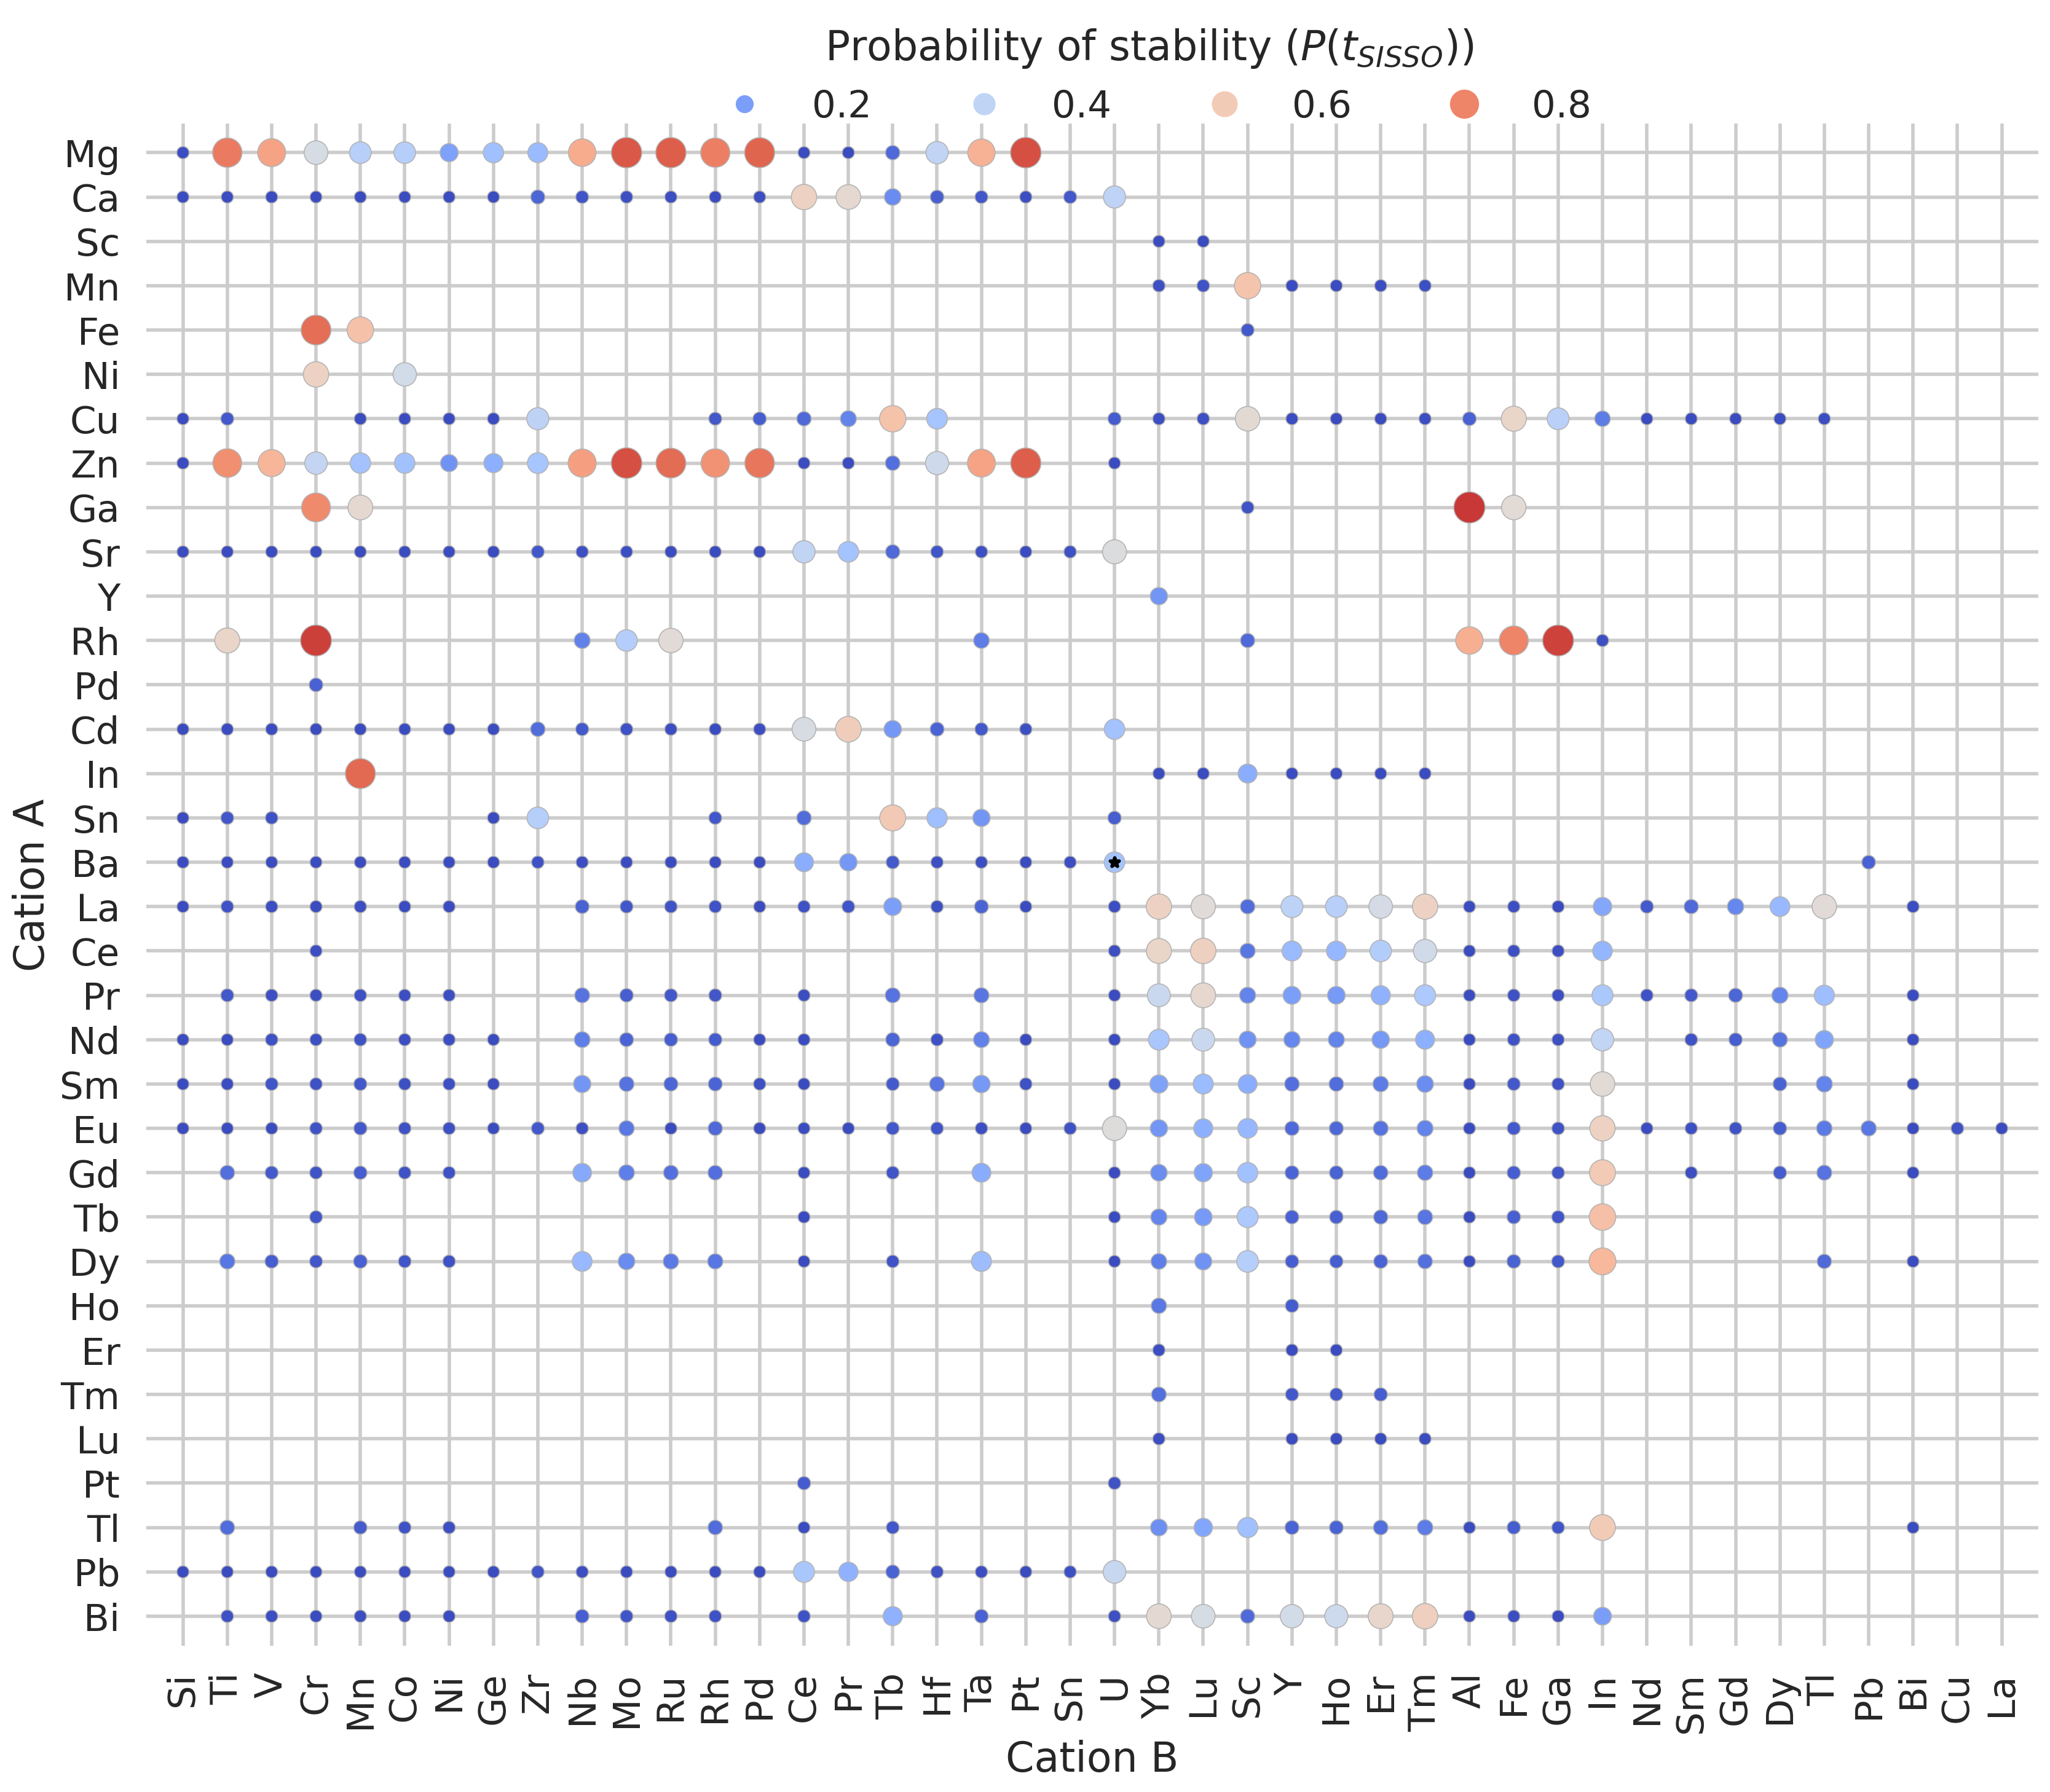

In [ ]:
plot_matrix(df_generated_comp, idx=55, anion='Se', highlight_points=extracted_elements)

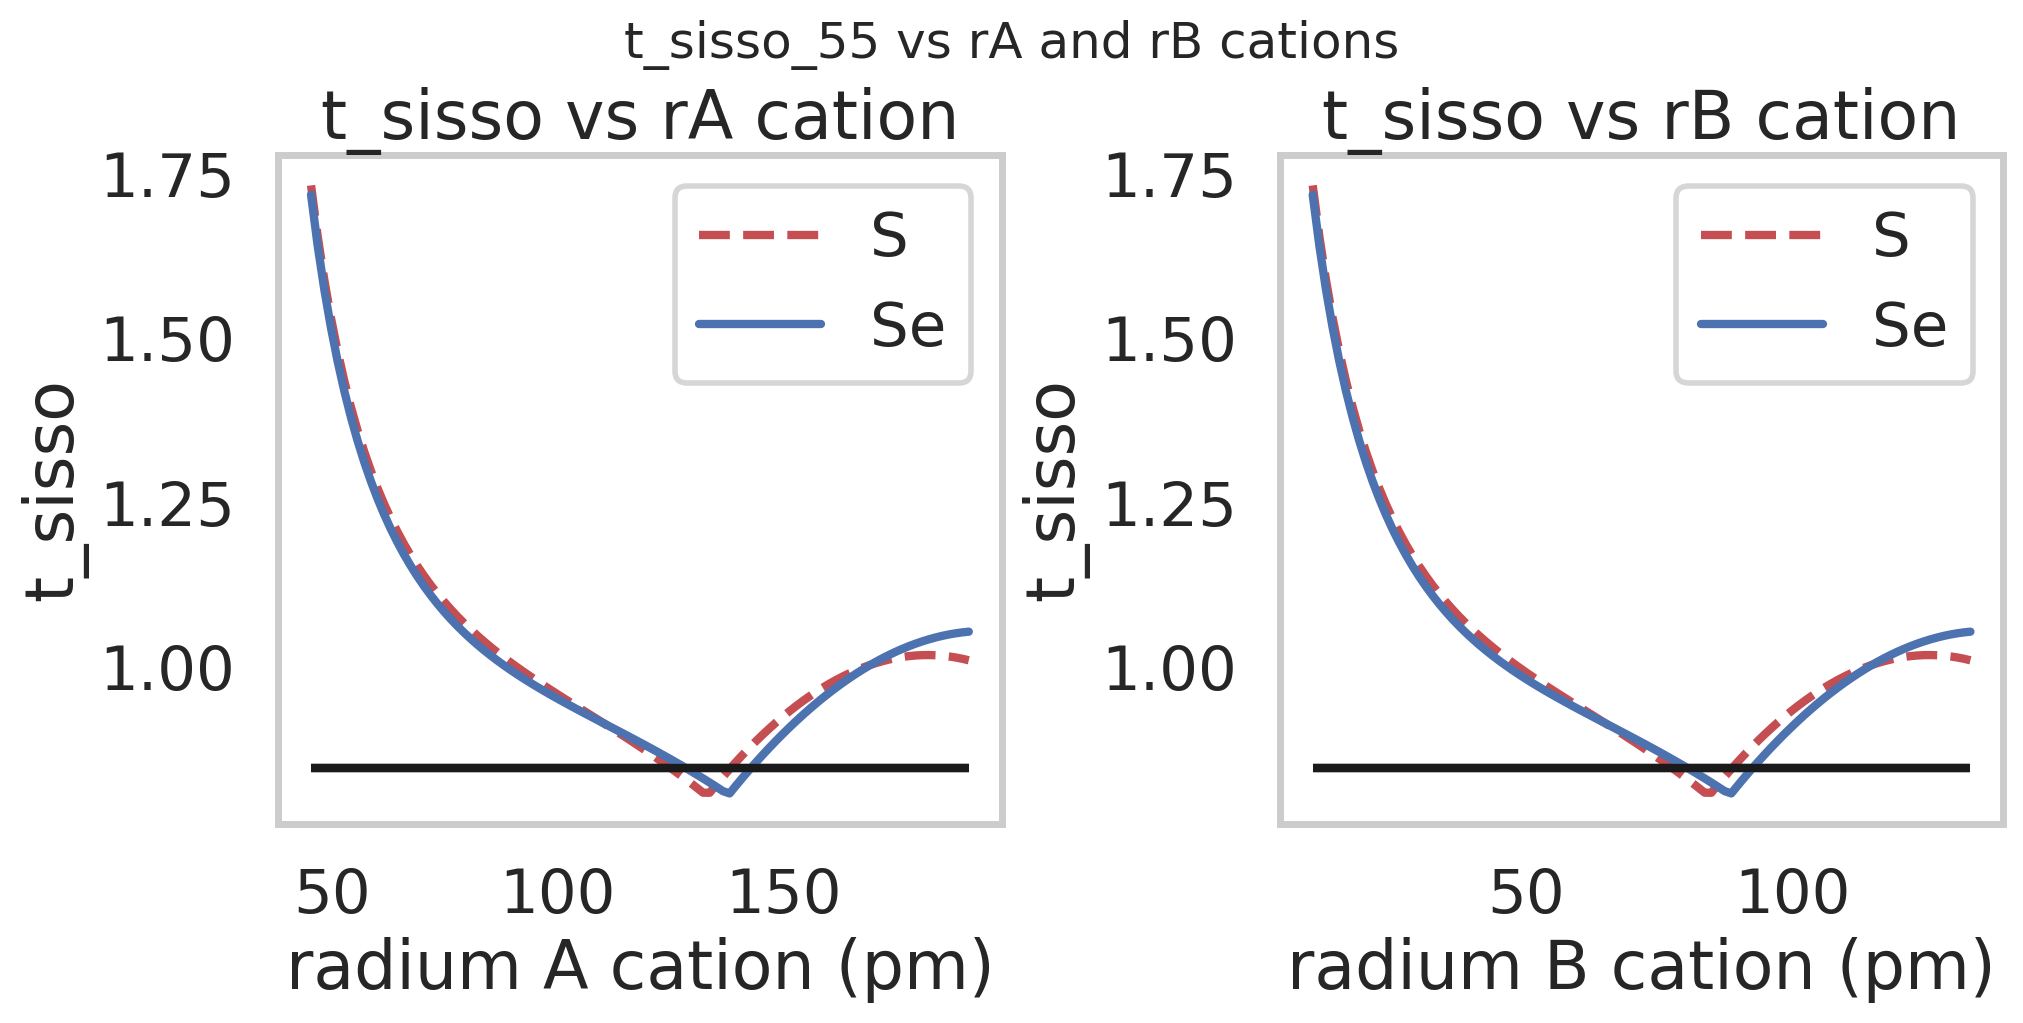

In [ ]:
#TODO plot stuff vs r_A and r_B for different cations

def plot_vals(df, anion='S', axs=None, idx=5):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    if anion == 'S':
        rX = 184.4
        sty = 'r--'
    elif anion == 'Se':
        rX = 198.14
        sty = 'b'

    if idx == 33:
        #t_sisso 33
        t_sisso = 't_sisso = ((sqrt(rA_rX_ratio) + sqrt(rB_rX_ratio)) - ((rA_rX_ratio - log_rA_rB_ratio) + sqrt(log_rA_rB_ratio))) '
        th = 0.5850899517536163
    elif idx == 5:
        #t_sisso 5
        t_sisso = 't_sisso = abs(((rA_rX_ratio**3) - abs(rB_rX_ratio - log_rA_rB_ratio)) - (abs(rA_rX_ratio - log_rA_rB_ratio) + (rB_rX_ratio + log_rA_rB_ratio))) '
        th = 0.8455010652542114 
    elif idx == 55:
        t_sisso = 't_sisso = abs(((rA_rX_ratio + rB_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - (rA_rX_ratio**3))'
        th = 0.8455010652542114
        
    
    d_r = 30 #pm


    r_A_values = np.linspace(df.rA.min()- d_r, df.rA.max() + d_r, 100)
    r_B_values = np.linspace(df.rB.min()- d_r, df.rB.max() + d_r, 100)
    #chi_BX_values = np.linspace(df.chi_BX_ratio.min()-0.1, df.chi_BX_ratio.max()+0.1, 100)

    results_df = pd.DataFrame(columns=['rA_rX_ratio', 'rB_rX_ratio', 'chi_BX_ratio', 'log_rA_rB_ratio', 't_sisso'])
    results_df['rA_rX_ratio'] = r_A_values / rX
    results_df['rB_rX_ratio'] = r_B_values / rX
    results_df['rA'] = r_A_values
    results_df['rB'] = r_B_values
    #results_df['chi_BX_ratio'] = chi_BX_values
    results_df['log_rA_rB_ratio'] = np.log(r_A_values / r_B_values)
    results_df.eval(t_sisso, inplace=True)

    if axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    else:
        fig = axs[0].figure
    
    fig.suptitle('t_sisso_' + str(idx) + ' vs rA and rB cations')
    axs[0].set_title('t_sisso vs rA cation')
    axs[1].set_title('t_sisso vs rB cation')



    axs[0].plot(r_A_values, results_df['t_sisso'], sty, label=anion)
    axs[0].hlines(th, r_A_values.min(), r_A_values.max(), color='k')
    axs[0].set_xlabel('radium A cation (pm)')
    axs[0].set_ylabel('t_sisso')
    axs[0].legend()
    axs[0].grid(False)

    axs[1].plot(r_B_values, results_df['t_sisso'], sty, label=anion)
    axs[1].hlines(th, r_B_values.min(), r_B_values.max(), color='k')
    axs[1].set_xlabel('radium B cation (pm)')
    axs[1].set_ylabel('t_sisso')
    axs[1].legend()
    axs[1].grid(False)
    return axs

    """plt.plot(chi_BX_values, results_df['t_sisso'])
    plt.hlines(1.9971271753311157, chi_BX_values.min(), chi_BX_values.max(), color='r')
    plt.xlabel('chi_BX_values (arb. units)')
    plt.ylabel('t_sisso')
    plt.show()

    ax = plt.figure().add_subplot(projection='3d')
    
    ax.plot_surface(r_B_values, chi_BX_values, results_df['t_sisso'], edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
    
    plt.show()"""

axs = plot_vals(df_generated_comp, anion='S', idx=55)
axs = plot_vals(df_generated_comp, anion='Se', axs=axs, idx=55)
plt.show()

In [ ]:
def t_sisso_color_plot(df_generated_comp, anion, idx=55):
    import numpy as np
    import seaborn as sns
    import pandas as pd

    sns.set_context('poster')

    if idx == 55:
        t_sisso_exp = 'abs(((rA_rX_ratio + rB_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - (rA_rX_ratio**3))'

    d_r = 30 #pm

    if anion == 'S':
        rX = 184.4
    elif anion == 'Se':
        rX = 198.14
    
    def f(x, y, t_sisso_exp, rX):

        var = {'rA_rX_ratio': x/rX,
               'rB_rX_ratio': y/rX,
               'log_rA_rB_ratio':np.log(x / y)}
        
        return eval(t_sisso_exp, var)

    def evaluate_z(x_range, y_range, step=1, t_sisso_exp='', rX='S'):
        x_values = np.arange(x_range[0], x_range[1] + step, step)
        y_values = np.arange(y_range[0], y_range[1] + step, step)
        
        xy_pairs = []
        z_list = []#np.zeros((len(x_values), len(y_values)))
        
        for i, x in enumerate(x_values):
            for j, y in enumerate(y_values):
                xy_pairs.append((x, y))
                z_list.append(f(x, y, t_sisso_exp, rX))
        
        return xy_pairs, z_list

    # Define range of x and y
    df = df_generated_comp.copy()
    x_range = (df.rA.min()- d_r, df.rA.max() + d_r,)  # Change as needed
    y_range = (df.rB.min()- d_r, df.rB.max()+ d_r)  # Change as needed
    step = 25/(df.rB.max()- df.rB.min())  # Step size

    xy_pairs, z_values = evaluate_z(x_range, y_range, step, t_sisso_exp, rX)

    # Convert to DataFrame for heatmap
    df = pd.DataFrame(xy_pairs, columns=["rA", "rB"])
    df["t_sisso"] = z_values

    sns.displot(data=df, x='rB', y='rA', hue='t_sisso')

t_sisso_color_plot(df_generated_comp, 'S', 55)

/home/nomad-lanasc/.pyenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

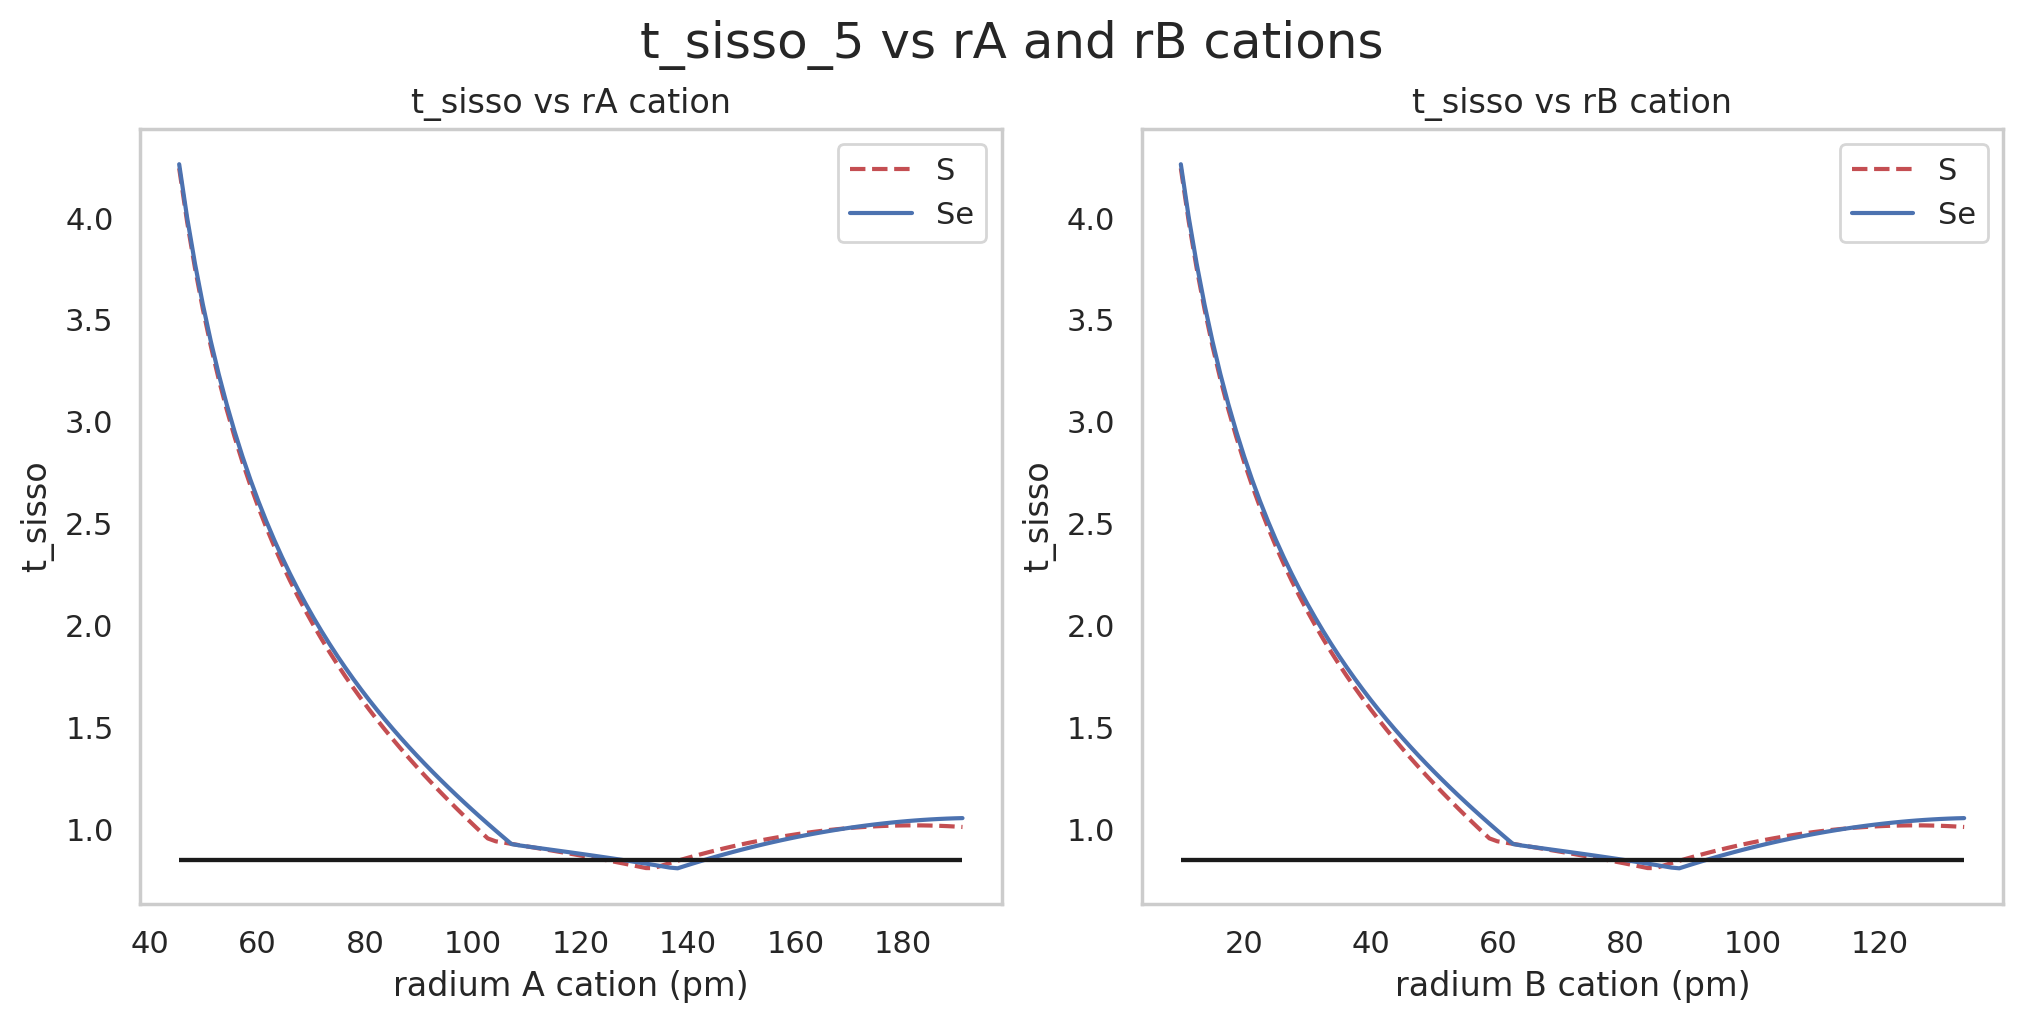

In [ ]:
axs = plot_vals(df_generated_comp, anion='S', idx=5)
axs = plot_vals(df_generated_comp, anion='Se', axs=axs, idx=5)
plt.show()